# 사이버폭력 실태조사 통계자료 분석_2021

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [2]:
data = pd.read_csv('한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(학생)_20211231.csv', encoding='euc-kr')

C:\Users\User\AppData\Local\Temp\ipykernel_17188\2117154974.py:1: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(학생)_20211231.csv', encoding='euc-kr')


In [3]:
data.head()

,idx,학교,시도,행정구,행정구역분류,학교급,고등학교유형,학교세부유형,남녀공학구분,지역규모,...,A_5,A_6,A_7,A_8,A_7_etc,B_1,B_2,C,D,WT
0,1,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,5,5,5,4,558.306878
1,2,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,NaN,NaN,NaN,NaN,NaN,5,5,4,5,635.757962
2,3,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,4,4,6,5,635.757962
3,4,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,5,5,5,4,635.757962
4,5,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,4,5,4,4,558.306878


## 💛 기본 정보 단변량

### ❕ 학교급

범주별 빈도수
초등학교    3011
고등학교    3004
중학교     3002
Name: 학교급, dtype: int64

범주별 비율
초등학교    0.333925
고등학교    0.333148
중학교     0.332927
Name: 학교급, dtype: float64

bar chart


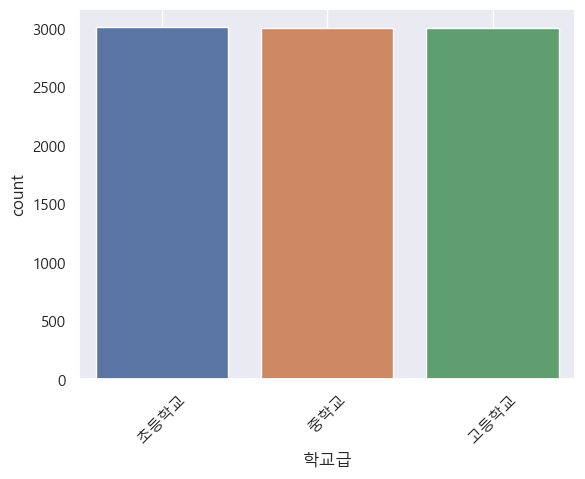

In [4]:
# 단변량 분석 (범주형 데이터)
# 범주별 빈도수, 범주별 비율, barchart
def uni_eda_c(data, target):
    print('범주별 빈도수')
    print(data[target].value_counts())
    print()
    print('범주별 비율')
    print(data[target].value_counts()/data.shape[0])
    print()
    print('bar chart')
    sns.countplot(x=data[target])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

uni_eda_c(data, '학교급')

### ❕ 고등학교 구분

In [5]:
map_dict = {1: '일반고', 2: '자율고', 3: '특수목적고', 4: '특성화고'}

범주별 빈도수
일반고      1970
특성화고      607
자율고       376
특수목적고      51
Name: SQ3a, dtype: int64

범주별 비율
일반고      0.218476
특성화고     0.067317
자율고      0.041699
특수목적고    0.005656
Name: SQ3a, dtype: float64

bar chart


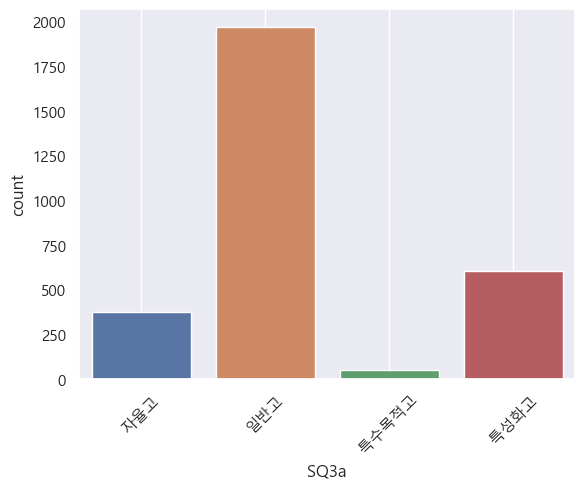

In [6]:
data1 = data.copy()
data1['SQ3a'] = data['SQ3a'].map(map_dict)
uni_eda_c(data1, 'SQ3a')

### ❕ 성별

범주별 빈도수
남자    4531
여자    4486
Name: SQ5, dtype: int64

범주별 비율
남자    0.502495
여자    0.497505
Name: SQ5, dtype: float64

bar chart


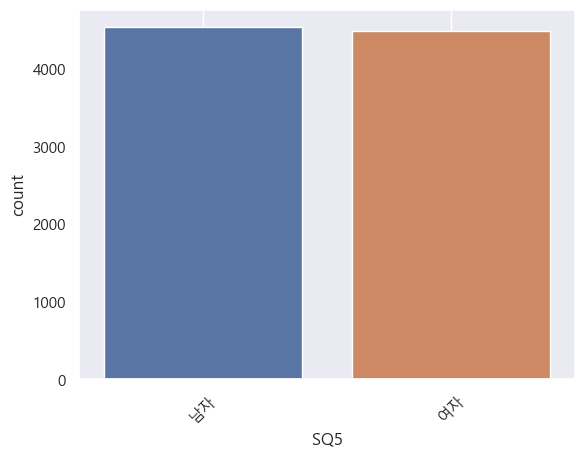

In [7]:
map_dict = {1: '남자', 2: '여자'}
data1['SQ5'] = data['SQ5'].map(map_dict)
uni_eda_c(data1, 'SQ5')

## 💛 사이버폭력 가해경험

### ❕ 나는 인터넷/스마트폰을 통해 누군가를 욕하거나 감정을 상하게 한 적이 있다

범주별 빈도수
전혀 없음       7958
1년에 한두번      515
6개월에 한두번     207
한달에 한두번      160
일주일에 한두번     118
거의 매일         59
Name: Q9a_1, dtype: int64

범주별 비율
전혀 없음       0.882555
1년에 한두번     0.057114
6개월에 한두번    0.022957
한달에 한두번     0.017744
일주일에 한두번    0.013086
거의 매일       0.006543
Name: Q9a_1, dtype: float64

bar chart


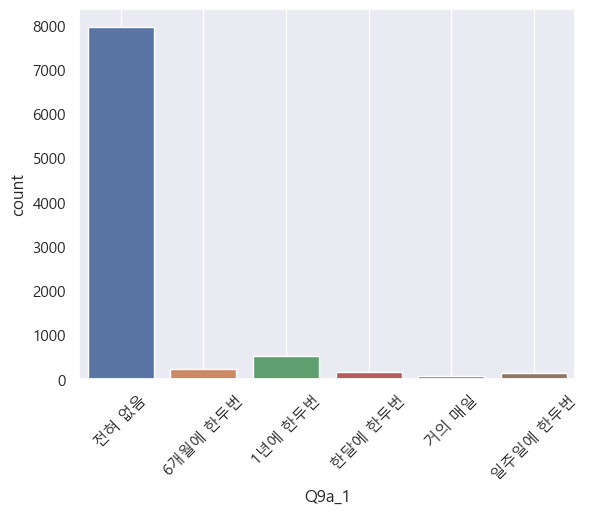

In [8]:
map_dict = {1: '1년에 한두번', 2: '6개월에 한두번', 3: '한달에 한두번', 4: '일주일에 한두번', 5:'거의 매일', 9:'전혀 없음'}
data1['Q9a_1'] = data['Q9a_1'].map(map_dict)
uni_eda_c(data1, 'Q9a_1')

In [10]:
data1['Q9a_1']

0       전혀 없음
1       전혀 없음
2       전혀 없음
3       전혀 없음
4       전혀 없음
        ...  
9012    전혀 없음
9013    전혀 없음
9014    전혀 없음
9015    전혀 없음
9016    전혀 없음
Name: Q9a_1, Length: 9017, dtype: object

범주별 빈도수
전혀 없음    7958
있음       1059
Name: Q9a_1, dtype: int64

범주별 비율
전혀 없음    0.882555
있음       0.117445
Name: Q9a_1, dtype: float64

bar chart


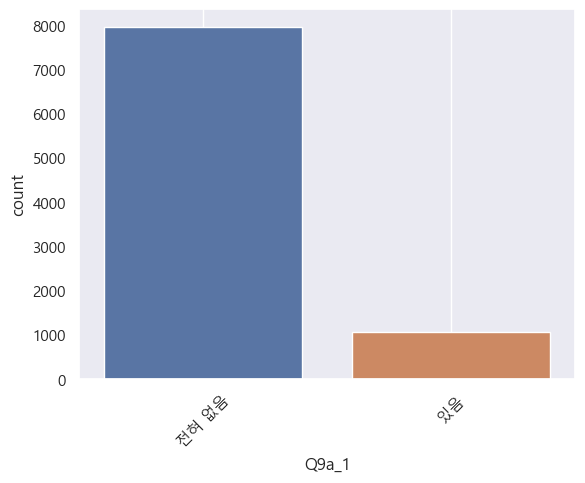

In [9]:
map_dict = {1: '있음', 2: '있음', 3: '있음', 4: '있음', 5:'있음', 9:'전혀 없음'}
data1['Q9a_1'] = data['Q9a_1'].map(map_dict)
uni_eda_c(data1, 'Q9a_1')

## 💛 사이버폭력 가해경험 - 친구와의 관계

### ❕ 폭력 경험 분리

범주별 빈도수
없음    7781
있음    1236
Name: 폭력경험, dtype: int64

범주별 비율
없음    0.862926
있음    0.137074
Name: 폭력경험, dtype: float64

bar chart


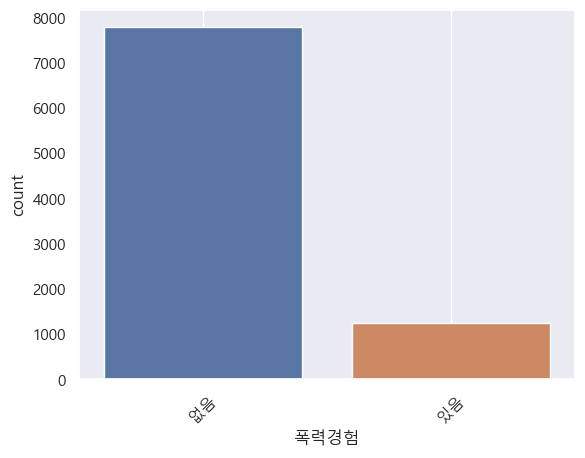

In [10]:
map_dict = {1: '있음', 2: '있음', 3: '있음', 4: '있음', 5:'있음', 9:'전혀 없음'}
data1['Q9a_1'] = data['Q9a_1'].map(map_dict)
data1['Q9a_2'] = data['Q9a_2'].map(map_dict)
data1['Q9a_3'] = data['Q9a_3'].map(map_dict)
data1['Q9a_4'] = data['Q9a_4'].map(map_dict)
data1['Q9a_5'] = data['Q9a_5'].map(map_dict)
data1['Q9a_6'] = data['Q9a_6'].map(map_dict)
data1['Q9a_7'] = data['Q9a_7'].map(map_dict)
data1['Q9a_8'] = data['Q9a_8'].map(map_dict)

data1['폭력경험'] = '없음'
data1.loc[(data1['Q9a_1']=='있음') | (data1['Q9a_2']=='있음') | (data1['Q9a_3']=='있음') | (data1['Q9a_4']=='있음') | (data1['Q9a_5']=='있음') | (data1['Q9a_6']=='있음') | (data1['Q9a_7']=='있음') | (data1['Q9a_8']=='있음'), '폭력경험'] = '있음'
uni_eda_c(data1, '폭력경험')

### ❗ 내 친구들은 나와 이야기를 나눌 때 서로 생각이 달라도 존중해 준다

범주별 빈도수
그렇다          5581
매우 그렇다       2811
그렇지 않다        518
전혀 그렇지 않다     107
Name: Q11_1, dtype: int64

범주별 비율
그렇다          0.618942
매우 그렇다       0.311744
그렇지 않다       0.057447
전혀 그렇지 않다    0.011866
Name: Q11_1, dtype: float64

bar chart


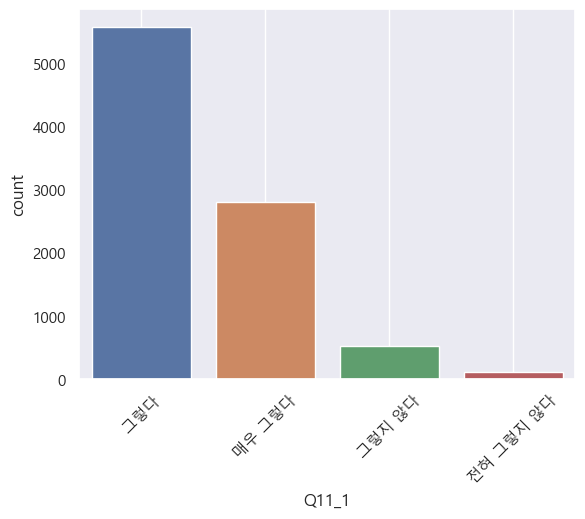

In [11]:
map_dict = {1: '전혀 그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '매우 그렇다'}
data1['Q11_1'] = data['Q11_1'].map(map_dict)
uni_eda_c(data1, 'Q11_1')

카이제곱통계량: 74.98602138100497,  p-value: 4.740586228145399e-18,  자유도: 1
기대빈도: [[7241.67150937  539.32849063]
 [1150.32849063   85.67150937]]


<Figure size 2000x2000 with 0 Axes>

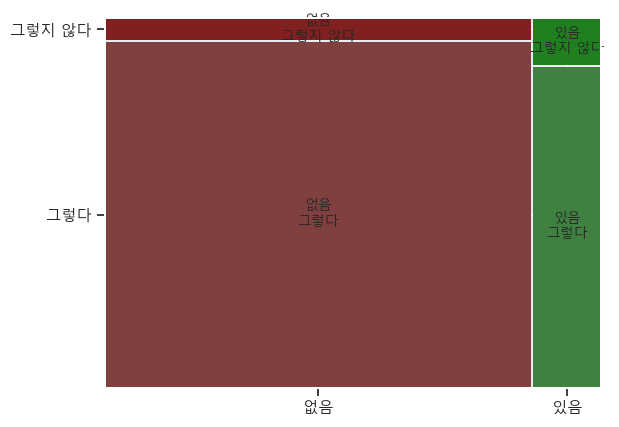

In [47]:
# mosaic, 카이제곱검정
def vi_eda_crosstab(data, feature, target):
    print('열 기준 crosstab')
    display(pd.crosstab(data[feature], data[target], normalize='columns'))
    
    print('행 기준 crosstab')
    display(pd.crosstab(data[feature], data[target], normalize='index'))
    
    print('100% 기준 crosstab')
    display(pd.crosstab(data[feature], data[target], normalize='all'))
    
def vi_eda_cc(data, feature, target):
    table = pd.crosstab(data[feature], data[target])
    values = spst.chi2_contingency(table)
    print(f'카이제곱통계량: {values[0]},  p-value: {values[1]},  자유도: {values[2]}')
    print(f'기대빈도: {values[3]}')
    
    plt.figure(figsize=(20, 20))
    mosaic(data, [feature, target])
    plt.show()
    

vi_eda_cc(data1, '폭력경험', 'Q11_1')

카이제곱통계량: 74.98602138100497,  p-value: 4.740586228145399e-18,  자유도: 1
기대빈도: [[7241.67150937  539.32849063]
 [1150.32849063   85.67150937]]


<Figure size 2000x2000 with 0 Axes>

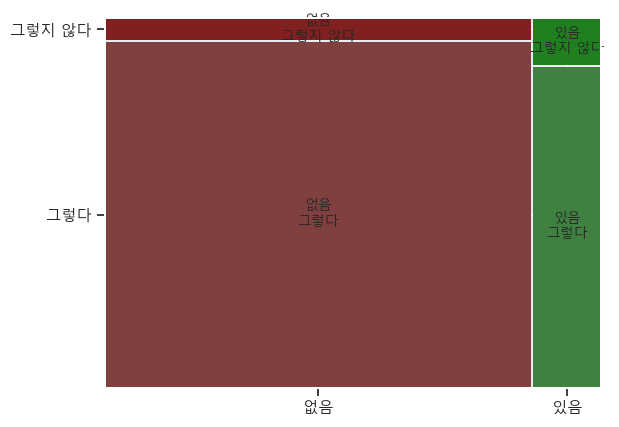

In [13]:
map_dict = {1: '그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '그렇다'}
data1['Q11_1'] = data['Q11_1'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q11_1')

### ❗ 내 친구들은 내가 말하는 것에 관심을 갖고 들어 준다

카이제곱통계량: 79.31661431227276,  p-value: 5.291286546599934e-19,  자유도: 1
기대빈도: [[7201.11400688  579.88599312]
 [1143.88599312   92.11400688]]


<Figure size 2000x2000 with 0 Axes>

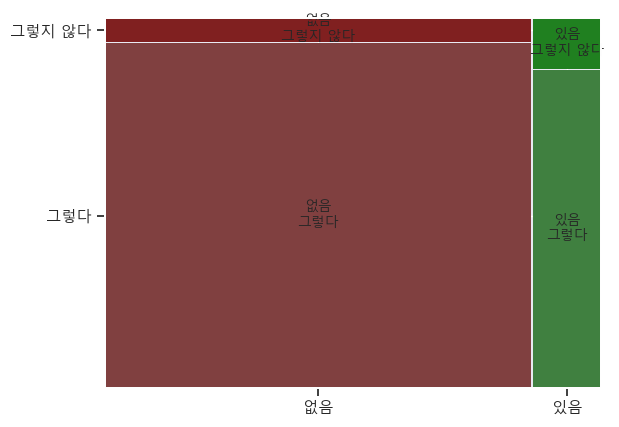

In [14]:
map_dict = {1: '그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '그렇다'}
data1['Q11_2'] = data['Q11_2'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q11_2')

### ❗ 나는 친구들에게 내 고민과 문제를 솔직하게 털어놓는다

카이제곱통계량: 28.63661047733235,  p-value: 8.73156501226256e-08,  자유도: 1
기대빈도: [[5900.68515027 1880.31484973]
 [ 937.31484973  298.68515027]]


<Figure size 2000x2000 with 0 Axes>

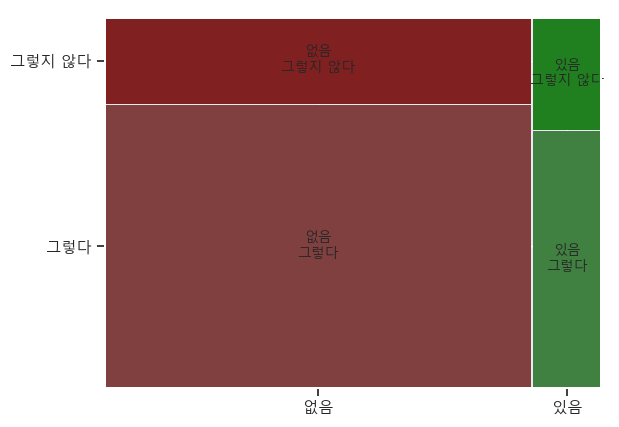

In [15]:
map_dict = {1: '그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '그렇다'}
data1['Q11_3'] = data['Q11_3'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q11_3')

### ❗ 친구와의 관계 (통합)

범주별 빈도수
좋음    6397
나쁨    2620
Name: 친구와의 관계, dtype: int64

범주별 비율
좋음    0.709438
나쁨    0.290562
Name: 친구와의 관계, dtype: float64

bar chart


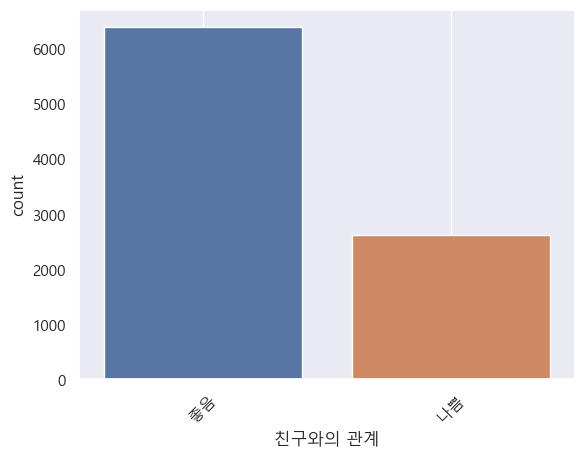

In [16]:
data1['친구와의 관계'] = '좋음'
data1.loc[(data1['Q11_1']=='그렇지 않다') | (data1['Q11_2']=='그렇지 않다') | (data1['Q11_3']=='그렇지 않다'), '친구와의 관계'] = '나쁨'
uni_eda_c(data1, '친구와의 관계')

카이제곱통계량: 73.78279516884524,  p-value: 8.720336533586155e-18,  자유도: 1
기대빈도: [[2260.86503272 5520.13496728]
 [ 359.13496728  876.86503272]]


<Figure size 2000x2000 with 0 Axes>

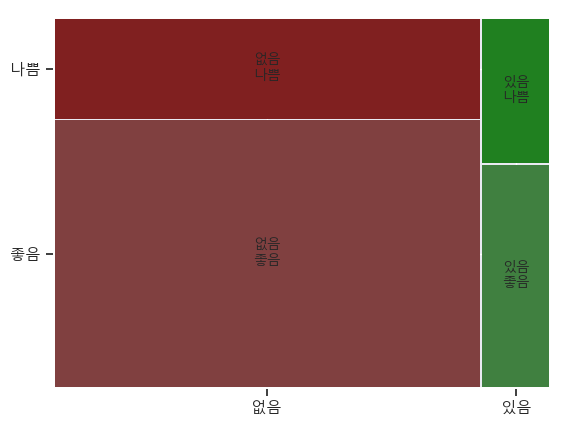

In [17]:
vi_eda_cc(data1, '폭력경험', '친구와의 관계')

## 💛 사이버폭력 가해경험 - 부모와의 관계

### ❗ 내 일은 나 스스로 결정할 수 있게 격려해 주신다

카이제곱통계량: 64.14432738122983,  p-value: 1.1563044803179218e-15,  자유도: 1
기대빈도: [[7145.88676944  635.11323056]
 [1135.11323056  100.88676944]]


<Figure size 2000x2000 with 0 Axes>

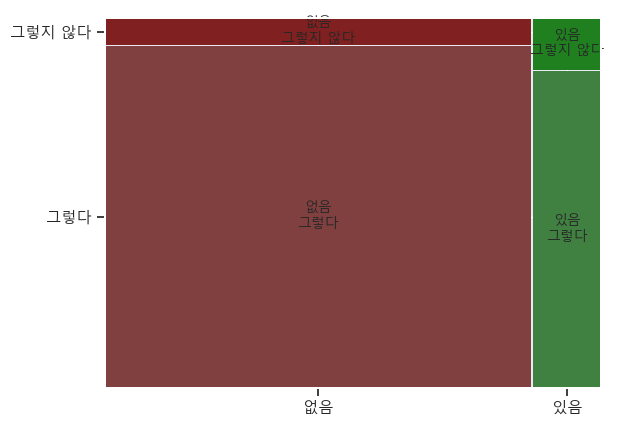

In [18]:
map_dict = {1: '그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '그렇다'}
data1['Q12_1'] = data['Q12_1'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q12_1')

### ❗ 내가 학교생활을 어떻게 하는지 관심 있게 물어보신다

카이제곱통계량: 51.32688918669522,  p-value: 7.819718004872158e-13,  자유도: 1
기대빈도: [[7074.26394588  706.73605412]
 [1123.73605412  112.26394588]]


<Figure size 2000x2000 with 0 Axes>

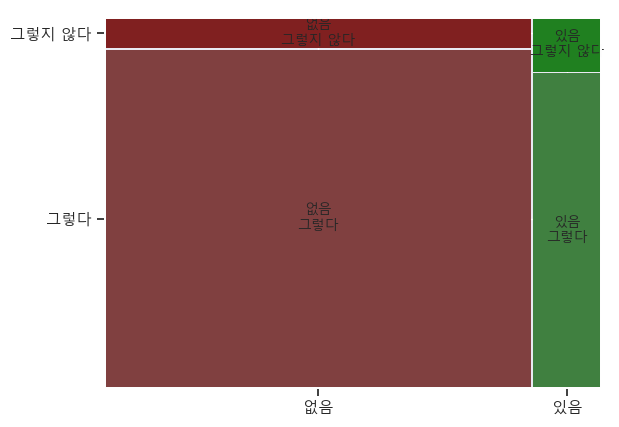

In [19]:
map_dict = {1: '그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '그렇다'}
data1['Q12_2'] = data['Q12_2'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q12_2')

### ❗ 사소한 것도 여쭤보면 잘 듣고 응답해 주신다

카이제곱통계량: 54.500998674242275,  p-value: 1.553688485346407e-13,  자유도: 1
기대빈도: [[7000.05234557  780.94765443]
 [1111.94765443  124.05234557]]


<Figure size 2000x2000 with 0 Axes>

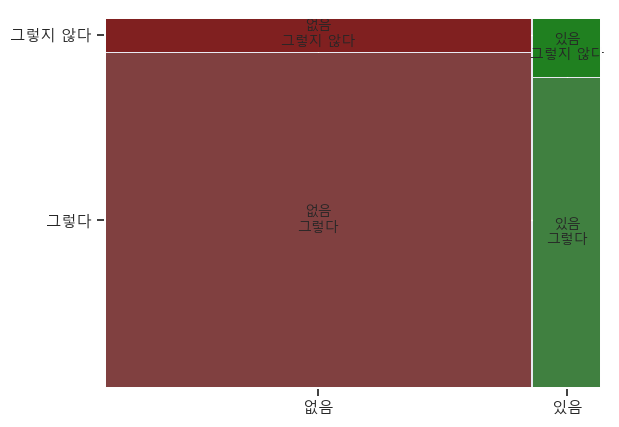

In [20]:
map_dict = {1: '그렇지 않다', 2: '그렇지 않다', 3: '그렇다', 4: '그렇다'}
data1['Q12_3'] = data['Q12_3'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q12_3')

### ❗ 부모와의 관계 (통합)

범주별 빈도수
좋음    7439
나쁨    1578
Name: 부모와의 관계, dtype: int64

범주별 비율
좋음    0.824997
나쁨    0.175003
Name: 부모와의 관계, dtype: float64

bar chart


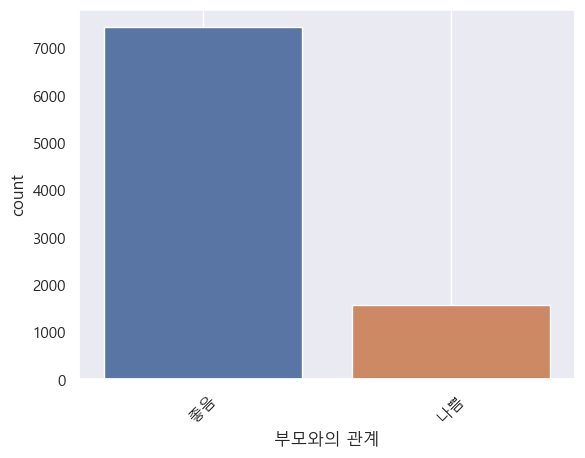

In [21]:
data1['부모와의 관계'] = '좋음'
data1.loc[(data1['Q12_1']=='그렇지 않다') | (data1['Q12_2']=='그렇지 않다') | (data1['Q12_3']=='그렇지 않다'), '부모와의 관계'] = '나쁨'
uni_eda_c(data1, '부모와의 관계')

카이제곱통계량: 110.08036788740557,  p-value: 9.409738001307928e-26,  자유도: 1
기대빈도: [[1361.69657314 6419.30342686]
 [ 216.30342686 1019.69657314]]


<Figure size 2000x2000 with 0 Axes>

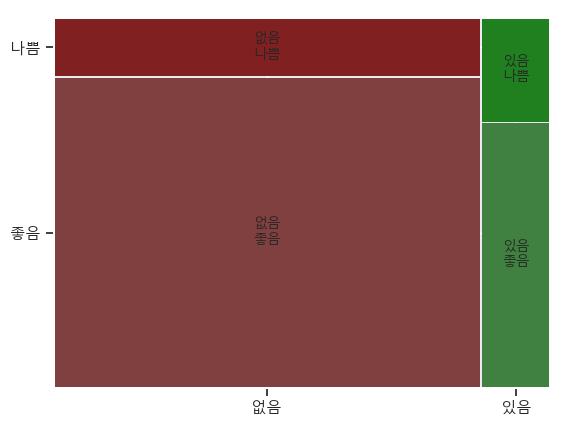

In [22]:
vi_eda_cc(data1, '폭력경험', '부모와의 관계')

## 💛 사이버폭력 가해경험 - 주변인의 사이버폭력 가해 사실 인지 현황

### ❕ 주변인의 사이버폭력 가해 사실 인지 현황 (단변량)

범주별 빈도수
아무도 모른다                 8205
내가 한 행위를 상대방은 알고 있다      328
친구들이 알고 있다               311
부모나 형제자매 등 가족이 알고 있다     137
선생님이 알고 계신다               36
Name: 주변가해인지현황, dtype: int64

범주별 비율
아무도 모른다                 0.909948
내가 한 행위를 상대방은 알고 있다     0.036376
친구들이 알고 있다              0.034490
부모나 형제자매 등 가족이 알고 있다    0.015194
선생님이 알고 계신다             0.003992
Name: 주변가해인지현황, dtype: float64

bar chart


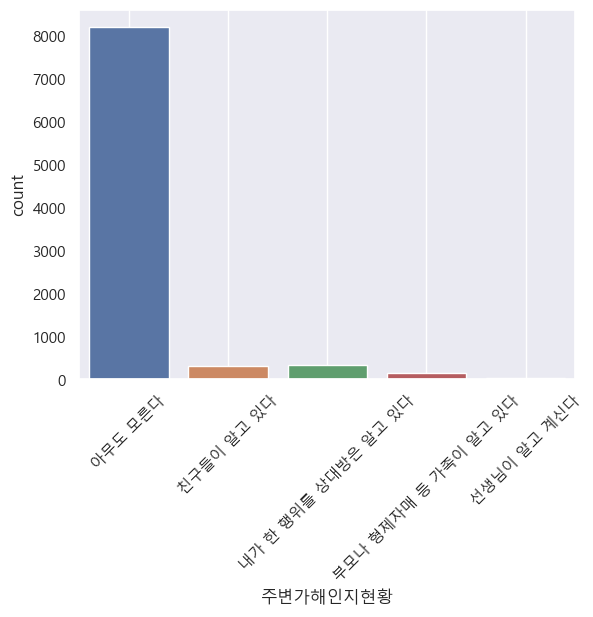

In [23]:
data1['주변가해인지현황'] = '아무도 모른다'
data1.loc[(data1['Q9_5_1']==1), '주변가해인지현황'] = '아무도 모른다'
data1.loc[(data1['Q9_5_2']==2), '주변가해인지현황'] = '내가 한 행위를 상대방은 알고 있다'
data1.loc[(data1['Q9_5_3']==3), '주변가해인지현황'] = '친구들이 알고 있다'
data1.loc[(data1['Q9_5_4']==4), '주변가해인지현황'] = '부모나 형제자매 등 가족이 알고 있다'
data1.loc[(data1['Q9_5_5']==5), '주변가해인지현황'] = '선생님이 알고 계신다'
uni_eda_c(data1, '주변가해인지현황')

## 💛 사이버폭력 가해경험 - 유해 컨텐츠 시청 경험

### ❕ 유해 컨텐츠 시청 경험

범주별 빈도수
9    2749
4    1820
3    1707
1    1182
2     885
5     674
Name: Q6_1, dtype: int64

범주별 비율
9    0.304869
4    0.201841
3    0.189309
1    0.131086
2    0.098148
5    0.074748
Name: Q6_1, dtype: float64

bar chart


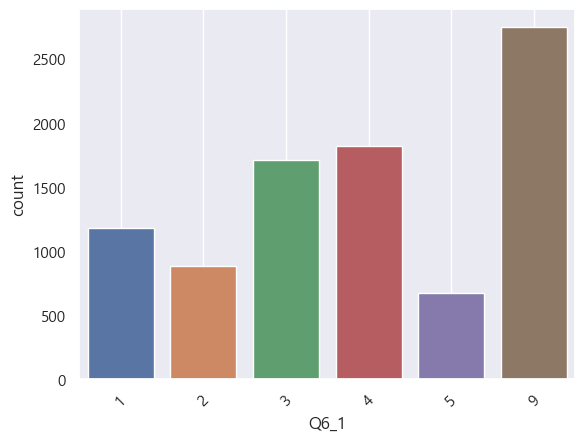

In [24]:
uni_eda_c(data1, 'Q6_1') # 폭력적이고 잔인한 내용

### ❗ 폭력적이고 잔인한 내용

카이제곱통계량: 231.69471547368357,  p-value: 4.876764588632337e-51,  자유도: 2
기대빈도: [[1783.66718421 2372.18243318 3625.15038261]
 [ 283.33281579  376.81756682  575.84961739]]


<Figure size 2000x2000 with 0 Axes>

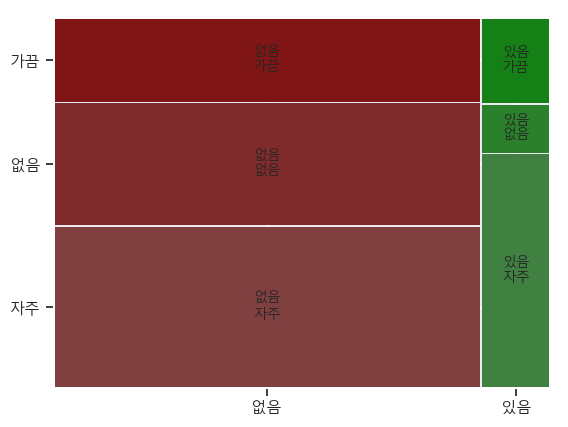

In [25]:
# 1년에 한두번, 6개월에 한두번 => 가끔
# 한달에 한두번, 일주일에 한두번, 거의 매일 => 자주

map_dict = {1: '가끔', 2: '가끔', 3: '자주', 4: '자주', 5: '자주', 9 : '없음'}
data1['Q6_1'] = data['Q6_1'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q6_1')

### ❗ 여성이나 남성의 신체 일부분 또는 남녀간의 행위와 관련된 선정적인 내용

카이제곱통계량: 153.7517109541019,  p-value: 4.104310179228919e-34,  자유도: 2
기대빈도: [[1486.82078297 3339.52201397 2954.65720306]
 [ 236.17921703  530.47798603  469.34279694]]


<Figure size 2000x2000 with 0 Axes>

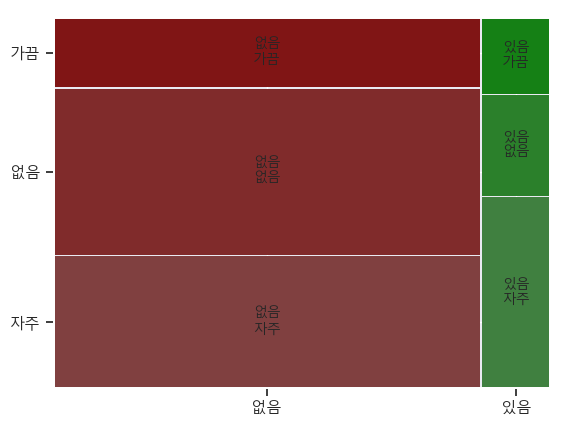

In [26]:
map_dict = {1: '가끔', 2: '가끔', 3: '자주', 4: '자주', 5: '자주', 9 : '없음'}
data1['Q6_2'] = data['Q6_2'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q6_2')

### ❗ 연예인이나 정치인 등 유명인을 헐뜯는(욕하거나 나쁘게 말하는) 내용

카이제곱통계량: 150.24647067534468,  p-value: 2.3680639702751097e-33,  자유도: 2
기대빈도: [[1332.35710325 2629.33425751 3819.30863924]
 [ 211.64289675  417.66574249  606.69136076]]


<Figure size 2000x2000 with 0 Axes>

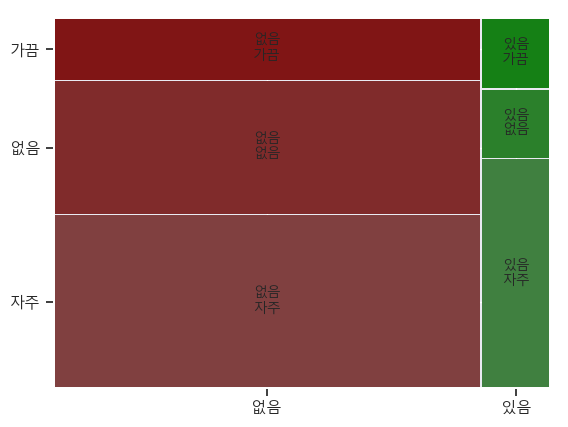

In [27]:
map_dict = {1: '가끔', 2: '가끔', 3: '자주', 4: '자주', 5: '자주', 9 : '없음'}
data1['Q6_3'] = data['Q6_3'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q6_3')

### ❗ (사기 도둑질과 같은) 불법 행동에 대한 내용

카이제곱통계량: 141.18081766528817,  p-value: 2.202799497244294e-31,  자유도: 2
기대빈도: [[1484.23200621 3364.54685594 2932.22113785]
 [ 235.76799379  534.45314406  465.77886215]]


<Figure size 2000x2000 with 0 Axes>

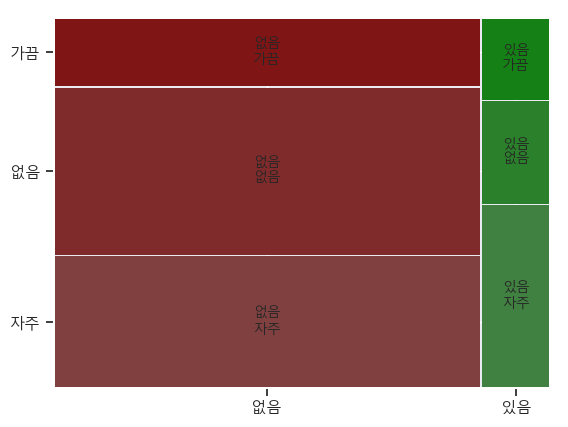

In [28]:
map_dict = {1: '가끔', 2: '가끔', 3: '자주', 4: '자주', 5: '자주', 9 : '없음'}
data1['Q6_4'] = data['Q6_4'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q6_4')

### ❗ 거짓을 사실인 것처럼 꾸민 허위 정보

카이제곱통계량: 146.04746962126808,  p-value: 1.932835634235375e-32,  자유도: 2
기대빈도: [[1397.07652212 2844.20272818 3539.7207497 ]
 [ 221.92347788  451.79727182  562.2792503 ]]


<Figure size 2000x2000 with 0 Axes>

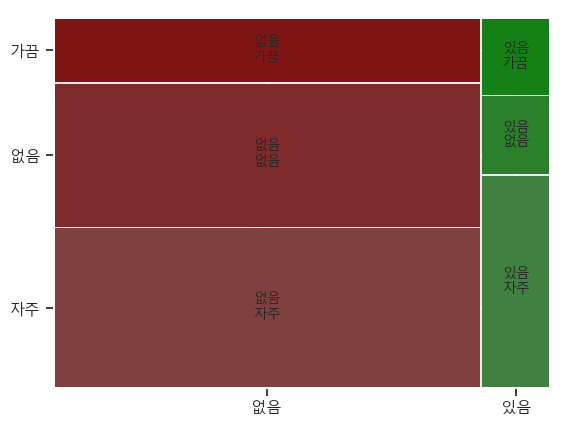

In [29]:
map_dict = {1: '가끔', 2: '가끔', 3: '자주', 4: '자주', 5: '자주', 9 : '없음'}
data1['Q6_5'] = data['Q6_5'].map(map_dict)
vi_eda_cc(data1, '폭력경험', 'Q6_5')

### ❕ 유해 컨텐츠 시청 경로

범주별 빈도수
동영상 제공 서비스        3028
SNS               2174
온라인 커뮤니티           797
포털 사이트             618
문자 혹은 인스턴트 메신저     400
기타                 118
Name: Q6_1a, dtype: int64

범주별 비율
동영상 제공 서비스        0.335810
SNS               0.241100
온라인 커뮤니티          0.088389
포털 사이트            0.068537
문자 혹은 인스턴트 메신저    0.044361
기타                0.013086
Name: Q6_1a, dtype: float64

bar chart


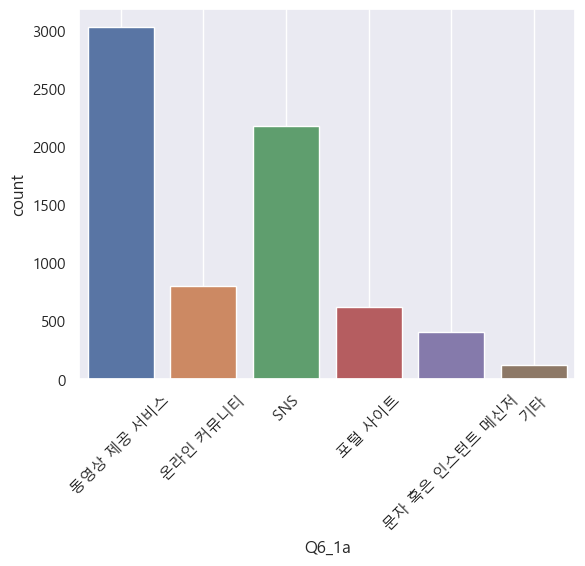

In [30]:
# 동영상 제공 서비스 (유튜브, 아프리카TV, 트위치 등)
# SNS (페이스북, 트위터, 블로그, 인스타그램, 틱톡 등)
# 온라인 커뮤니티 (네이버·다음 카페 등)
# 문자 혹은 인스턴트 메신저(카카오톡, 라인, 페이스북 메신저 등)
# 포털 사이트(네이버, 다음 등)

map_dict = {1: '동영상 제공 서비스', 2: 'SNS', 3: '온라인 커뮤니티', 4: '문자 혹은 인스턴트 메신저', 5: '포털 사이트', 6 : '기타'}
data1['Q6_1a'] = data['Q6_1a'].map(map_dict)
uni_eda_c(data1, 'Q6_1a')

## 💛 유해 컨텐츠 유형 - 사이버폭력 가해 유형

### ❗ 폭력적이고 잔인한 내용

In [31]:
# mosaic, 카이제곱검정
def vi_eda_crosstab(data, feature, target):
    print('열 기준 crosstab')
    display(pd.crosstab(data[feature], data[target], normalize='columns'))
    
    print('행 기준 crosstab')
    display(pd.crosstab(data[feature], data[target], normalize='index'))
    
    print('100% 기준 crosstab')
    display(pd.crosstab(data[feature], data[target], normalize='all'))
    
def vi_eda_cc(data, feature, target, title, p):
    table = pd.crosstab(data[feature], data[target])
    values = spst.chi2_contingency(table)
    p.append(values[1])
    print(f'카이제곱통계량: {values[0]},  p-value: {values[1]},  자유도: {values[2]}')
    print(f'기대빈도: {values[3]}')
    
    plt.figure(figsize=(20, 20))
    mosaic(data, [feature, target], title=title)
    plt.show()
    return p

카이제곱통계량: 214.24621424526077,  p-value: 2.9993399508864287e-47,  자유도: 2
기대빈도: [[ 242.75845625 1824.24154375]
 [ 322.85582788 2426.14417212]
 [ 493.38571587 3707.61428413]]


<Figure size 2000x2000 with 0 Axes>

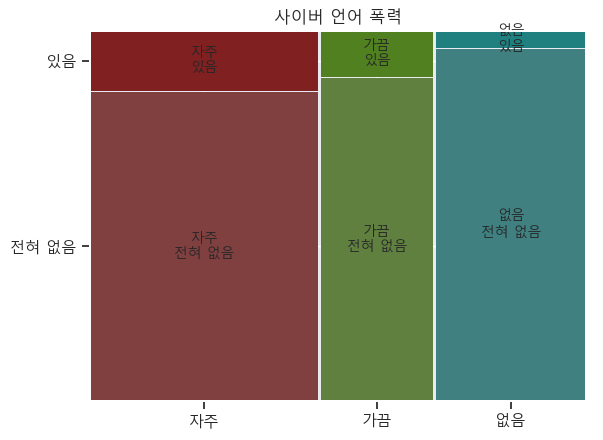

카이제곱통계량: 127.53096858166201,  p-value: 2.027692228266593e-28,  자유도: 2
기대빈도: [[  81.37795276 1985.62204724]
 [ 108.22834646 2640.77165354]
 [ 165.39370079 4035.60629921]]


<Figure size 2000x2000 with 0 Axes>

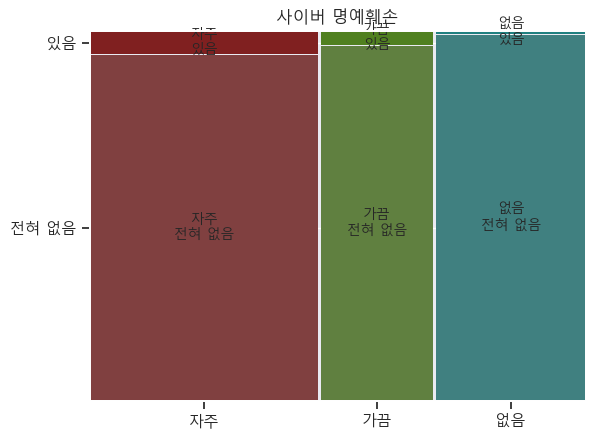

카이제곱통계량: 57.79766422069959,  p-value: 2.814470370931788e-13,  자유도: 2
기대빈도: [[  47.22213597 2019.77786403]
 [  62.8029278  2686.1970722 ]
 [  95.97493623 4105.02506377]]


<Figure size 2000x2000 with 0 Axes>

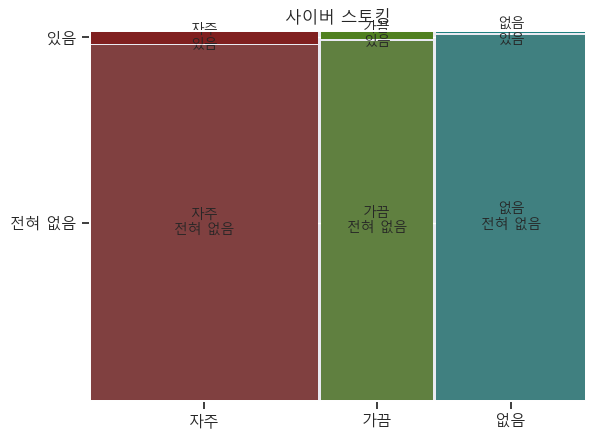

카이제곱통계량: 65.15420240543695,  p-value: 7.11122976930116e-15,  자유도: 2
기대빈도: [[  36.44815349 2030.55184651]
 [  48.47410447 2700.52589553]
 [  74.07774204 4126.92225796]]


<Figure size 2000x2000 with 0 Axes>

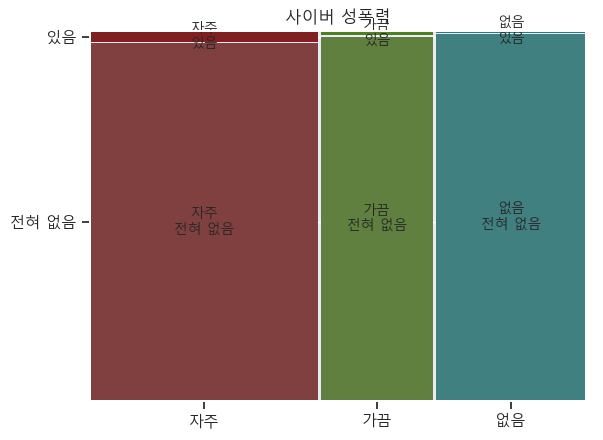

카이제곱통계량: 84.50860296370665,  p-value: 4.458512922716776e-19,  자유도: 2
기대빈도: [[  47.6806033  2019.3193967 ]
 [  63.41266497 2685.58733503]
 [  96.90673173 4104.09326827]]


<Figure size 2000x2000 with 0 Axes>

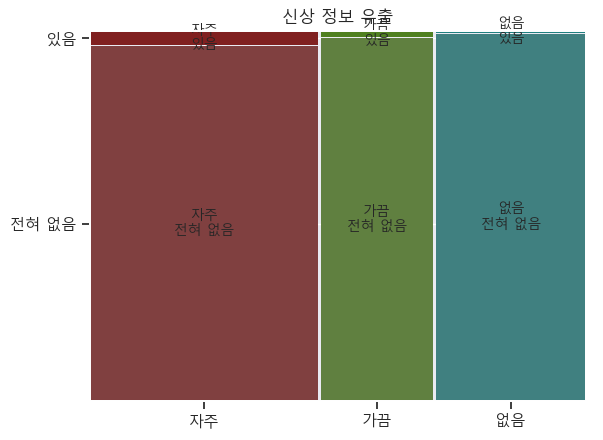

카이제곱통계량: 46.669709935115264,  p-value: 7.34177805691362e-11,  자유도: 2
기대빈도: [[  45.61750028 2021.38249972]
 [  60.66884773 2688.33115227]
 [  92.71365199 4108.28634801]]


<Figure size 2000x2000 with 0 Axes>

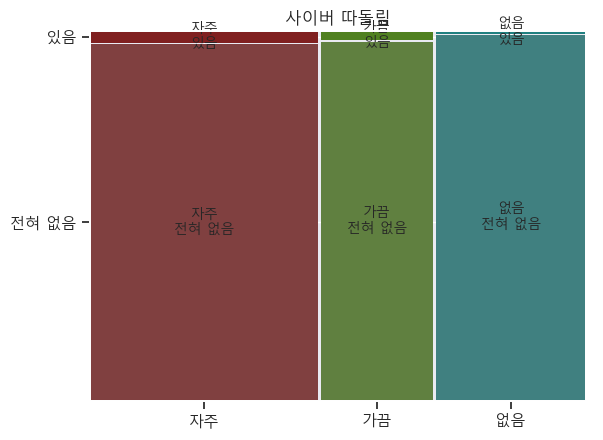

카이제곱통계량: 41.84982931586333,  p-value: 8.173819249246941e-10,  자유도: 2
기대빈도: [[  33.23888211 2033.76111789]
 [  44.20594433 2704.79405567]
 [  67.55517356 4133.44482644]]


<Figure size 2000x2000 with 0 Axes>

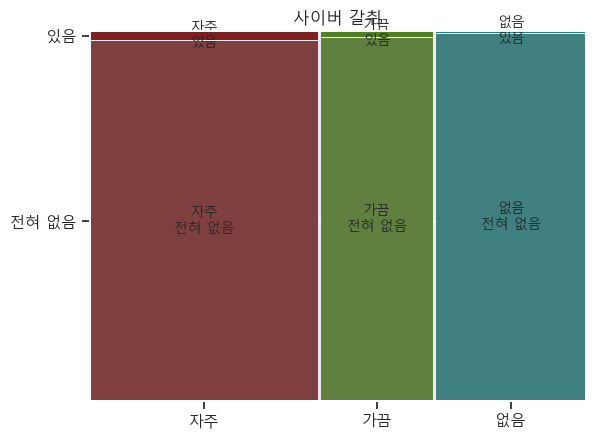

카이제곱통계량: 32.05057390430758,  p-value: 1.0972518096062957e-07,  자유도: 2
기대빈도: [[  31.63424642 2035.36575358]
 [  42.07186426 2706.92813574]
 [  64.29388932 4136.70611068]]


<Figure size 2000x2000 with 0 Axes>

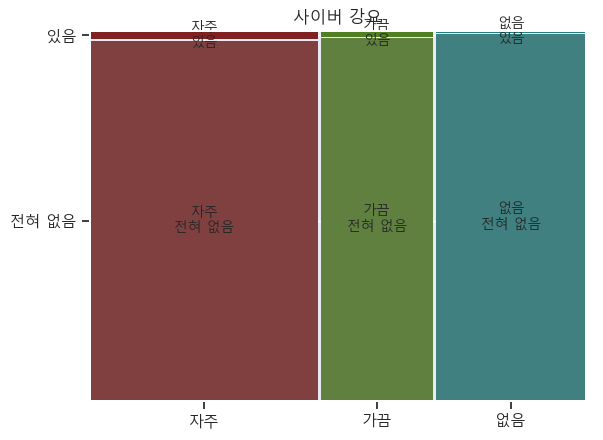

In [32]:
p1 = []
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_1', '사이버 언어 폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_2', '사이버 명예훼손', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_3', '사이버 스토킹', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_4', '사이버 성폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_5', '신상 정보 유출', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_6', '사이버 따돌림', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_7', '사이버 갈취', p1)
p1 = vi_eda_cc(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), 'Q6_1', 'Q9a_8', '사이버 강요', p1)

# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_1'], title='사이버 언어 폭력')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_2'], title='사이버 명예훼손')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_3'], title='사이버 스토킹')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_4'], title='사이버 성폭력')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_5'], title='신상 정보 유출')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_6'], title='사이버 따돌림')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_7'], title='사이버 갈취')
# mosaic(data1.sort_values(by='Q6_1', key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), ['Q6_1', 'Q9a_8'], title='사이버 강요')
# plt.show()

In [33]:
vi_dict = {0 : '사이버 언어 폭력', 1 : '사이버 명예훼손', 2 : '사이버 스토킹', 3: '사이버 성폭력', 4: '신상 정보 유출', 5 : '사이버 따돌림', 6 : '사이버 갈취', 7 : '사이버 강요'}
my_dict = {value: index for index, value in enumerate(p1)}
p1.sort()
sorted_list = p1
index_list = [my_dict[value] for value in p1]
index_list2 = [vi_dict[value] for value in index_list]
content_type = ['폭력/잔인한 내용' for _ in range(8)]
df1 = pd.DataFrame({'폭력 유형': index_list2, 'p-value': sorted_list, '컨텐츠 내용' : content_type})
df1

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,2.999340e-47,폭력/잔인한 내용
1,사이버 명예훼손,2.027692e-28,폭력/잔인한 내용
2,신상 정보 유출,4.458513e-19,폭력/잔인한 내용
3,사이버 성폭력,7.111230e-15,폭력/잔인한 내용
4,사이버 스토킹,2.814470e-13,폭력/잔인한 내용
5,사이버 따돌림,7.341778e-11,폭력/잔인한 내용
6,사이버 갈취,8.173819e-10,폭력/잔인한 내용
7,사이버 강요,1.097252e-07,폭력/잔인한 내용


### ❗ 여성이나 남성의 신체 일부분 또는 남녀간의 행위와 관련된 선정적인 내용

카이제곱통계량: 128.21725047152503,  p-value: 1.438725091161051e-28,  자유도: 2
기대빈도: [[ 202.35743595 1520.64256405]
 [ 454.51147832 3415.48852168]
 [ 402.13108573 3021.86891427]]


<Figure size 2000x2000 with 0 Axes>

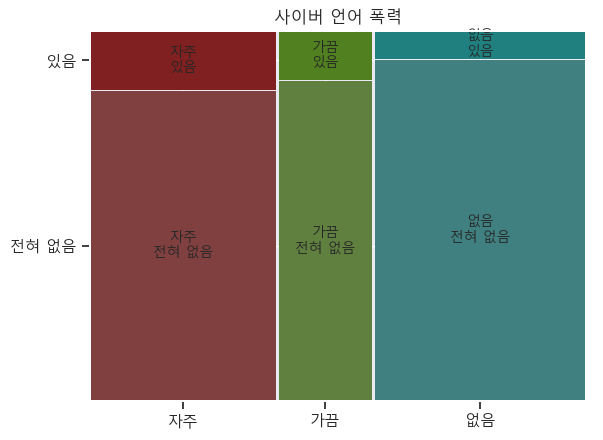

카이제곱통계량: 99.20096531333407,  p-value: 2.875968218486568e-22,  자유도: 2
기대빈도: [[  67.83464567 1655.16535433]
 [ 152.36220472 3717.63779528]
 [ 134.80314961 3289.19685039]]


<Figure size 2000x2000 with 0 Axes>

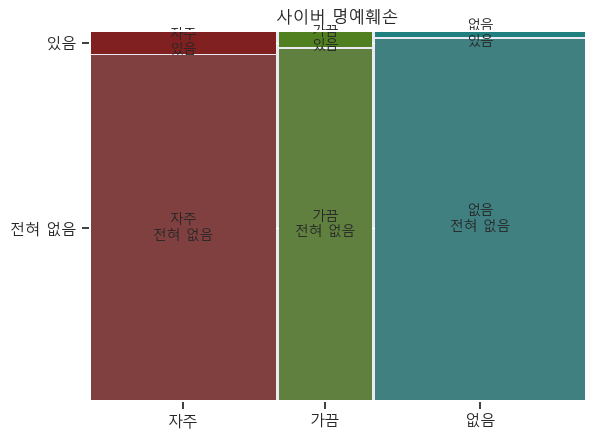

카이제곱통계량: 90.47248096365917,  p-value: 2.2602182469110362e-20,  자유도: 2
기대빈도: [[  39.36320284 1683.63679716]
 [  88.41299767 3781.58700233]
 [  78.22379949 3345.77620051]]


<Figure size 2000x2000 with 0 Axes>

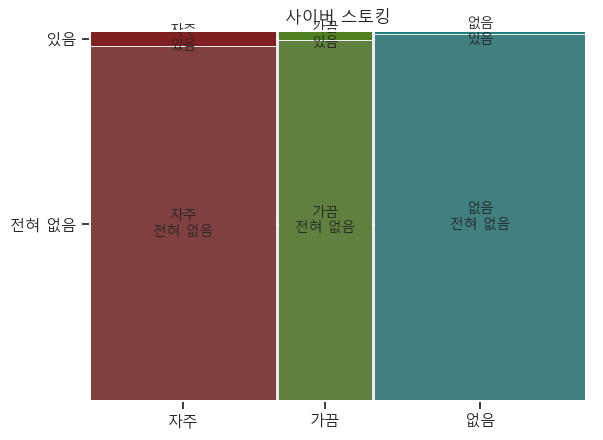

카이제곱통계량: 63.175741011012285,  p-value: 1.912326945115856e-14,  자유도: 2
기대빈도: [[  30.38227792 1692.61772208]
 [  68.24110014 3801.75889986]
 [  60.37662194 3363.62337806]]


<Figure size 2000x2000 with 0 Axes>

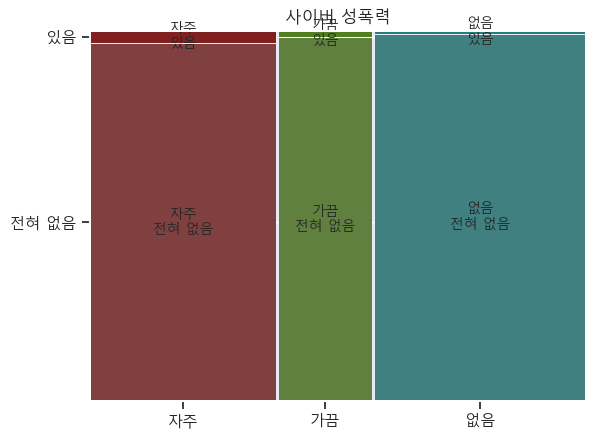

카이제곱통계량: 81.10630845097528,  p-value: 2.4433680806506763e-18,  자유도: 2
기대빈도: [[  39.74536986 1683.25463014]
 [  89.27137629 3780.72862371]
 [  78.98325385 3345.01674615]]


<Figure size 2000x2000 with 0 Axes>

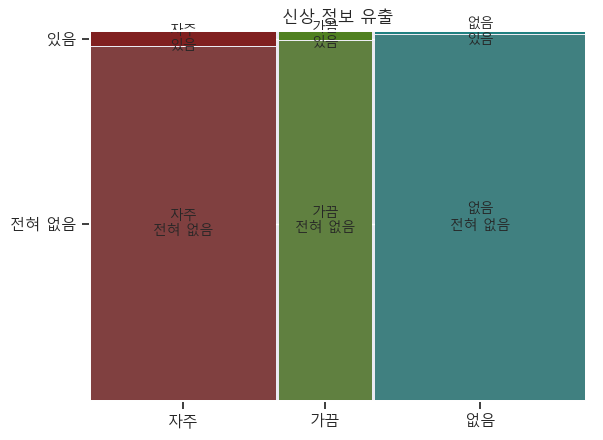

카이제곱통계량: 41.947153336143245,  p-value: 7.785587451660944e-10,  자유도: 2
기대빈도: [[  38.02561828 1684.97438172]
 [  85.40867251 3784.59132749]
 [  75.56570922 3348.43429078]]


<Figure size 2000x2000 with 0 Axes>

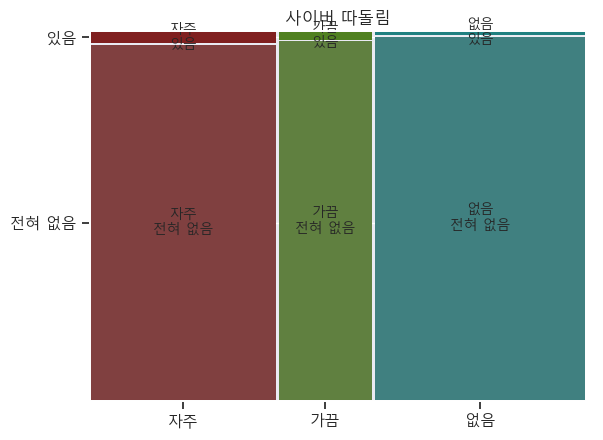

카이제곱통계량: 42.80960515282363,  p-value: 5.05839051938551e-10,  자유도: 2
기대빈도: [[  27.70710879 1695.29289121]
 [  62.23244982 3807.76755018]
 [  55.06044139 3368.93955861]]


<Figure size 2000x2000 with 0 Axes>

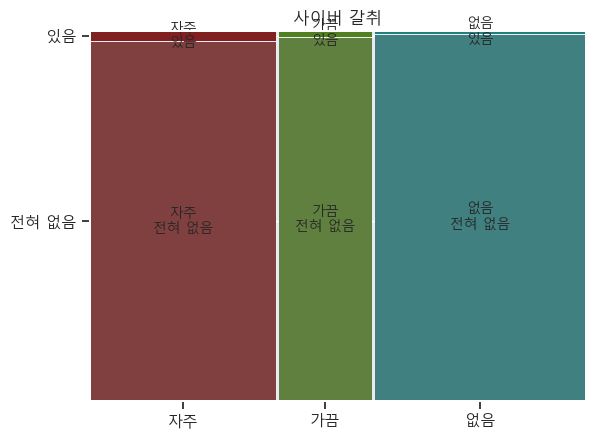

카이제곱통계량: 45.18236169030069,  p-value: 1.544453436210245e-10,  자유도: 2
기대빈도: [[  26.36952423 1696.63047577]
 [  59.22812465 3810.77187535]
 [  52.40235111 3371.59764889]]


<Figure size 2000x2000 with 0 Axes>

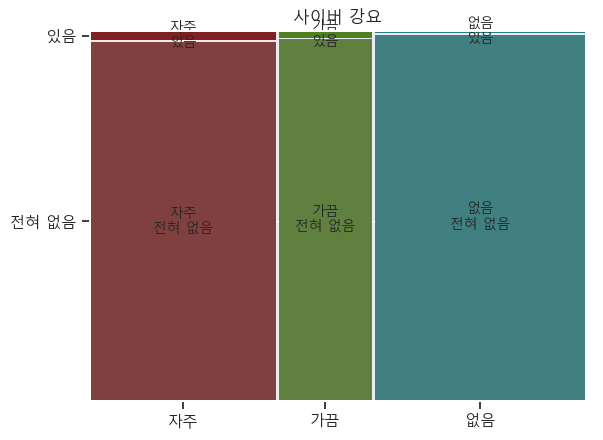

In [34]:
target_by = 'Q6_2'
p1 = []
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_1', '사이버 언어 폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_2', '사이버 명예훼손', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_3', '사이버 스토킹', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_4', '사이버 성폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_5', '신상 정보 유출', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_6', '사이버 따돌림', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_7', '사이버 갈취', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_8', '사이버 강요', p1)

In [35]:
vi_dict = {0 : '사이버 언어 폭력', 1 : '사이버 명예훼손', 2 : '사이버 스토킹', 3: '사이버 성폭력', 4: '신상 정보 유출', 5 : '사이버 따돌림', 6 : '사이버 갈취', 7 : '사이버 강요'}
my_dict = {value: index for index, value in enumerate(p1)}
p1.sort()
sorted_list = p1
index_list = [my_dict[value] for value in p1]
index_list2 = [vi_dict[value] for value in index_list]
content_type = ['선정적인 내용' for _ in range(8)]
df2 = pd.DataFrame({'폭력 유형': index_list2, 'p-value': sorted_list, '컨텐츠 내용' : content_type})
df2

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,1.438725e-28,선정적인 내용
1,사이버 명예훼손,2.875968e-22,선정적인 내용
2,사이버 스토킹,2.260218e-20,선정적인 내용
3,신상 정보 유출,2.443368e-18,선정적인 내용
4,사이버 성폭력,1.912327e-14,선정적인 내용
5,사이버 강요,1.544453e-10,선정적인 내용
6,사이버 갈취,5.058391e-10,선정적인 내용
7,사이버 따돌림,7.785587e-10,선정적인 내용


### ❗ 연예인이나 정치인 등 유명인을 헐뜯는(욕하거나 나쁘게 말하는) 내용

카이제곱통계량: 126.5353071962026,  p-value: 3.3358549579947247e-28,  자유도: 2
기대빈도: [[ 181.33481202 1362.66518798]
 [ 357.85438616 2689.14561384]
 [ 519.81080182 3906.18919818]]


<Figure size 2000x2000 with 0 Axes>

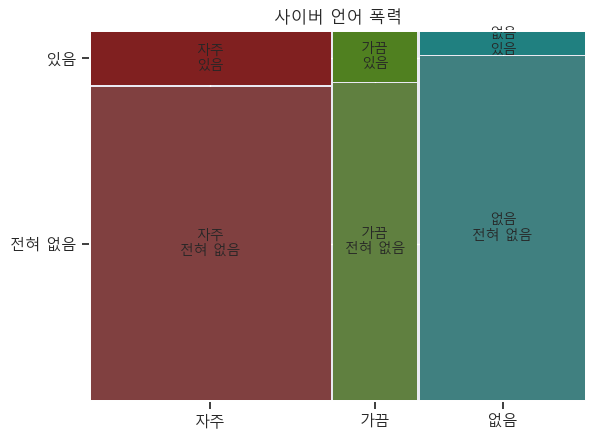

카이제곱통계량: 79.69053874565125,  p-value: 4.959288590261989e-18,  자유도: 2
기대빈도: [[  60.78740157 1483.21259843]
 [ 119.96062992 2927.03937008]
 [ 174.2519685  4251.7480315 ]]


<Figure size 2000x2000 with 0 Axes>

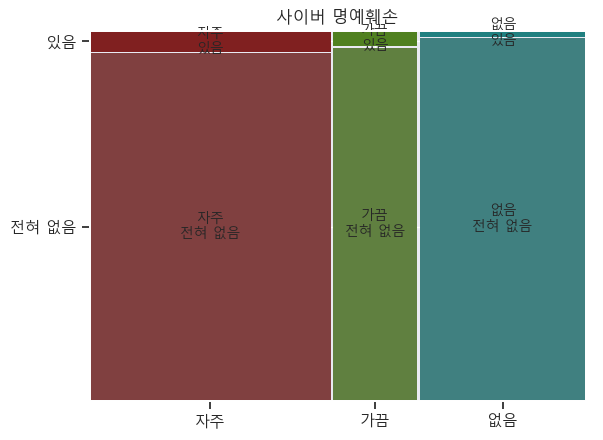

카이제곱통계량: 76.99147102679137,  p-value: 1.912117119081757e-17,  자유도: 2
기대빈도: [[  35.27381613 1508.72618387]
 [  69.61095708 2977.38904292]
 [ 101.11522679 4324.88477321]]


<Figure size 2000x2000 with 0 Axes>

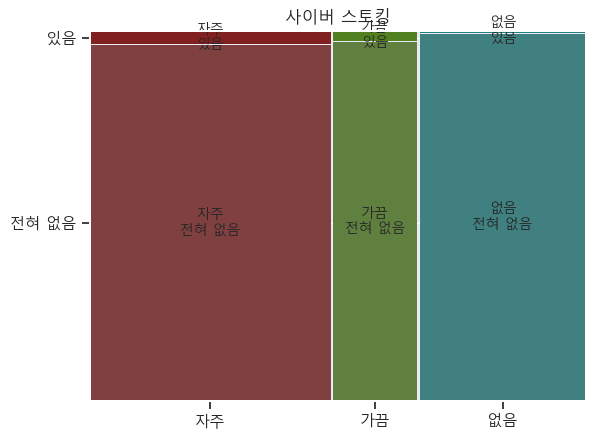

카이제곱통계량: 37.135537037090714,  p-value: 8.632182054642942e-09,  자유도: 2
기대빈도: [[  27.22590662 1516.77409338]
 [  53.72884551 2993.27115449]
 [  78.04524787 4347.95475213]]


<Figure size 2000x2000 with 0 Axes>

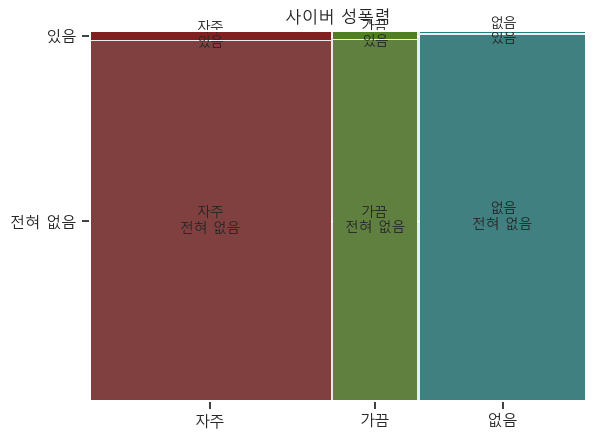

카이제곱통계량: 56.96682640481283,  p-value: 4.2639374034583094e-13,  자유도: 2
기대빈도: [[  35.61628036 1508.38371964]
 [  70.28679162 2976.71320838]
 [ 102.09692802 4323.90307198]]


<Figure size 2000x2000 with 0 Axes>

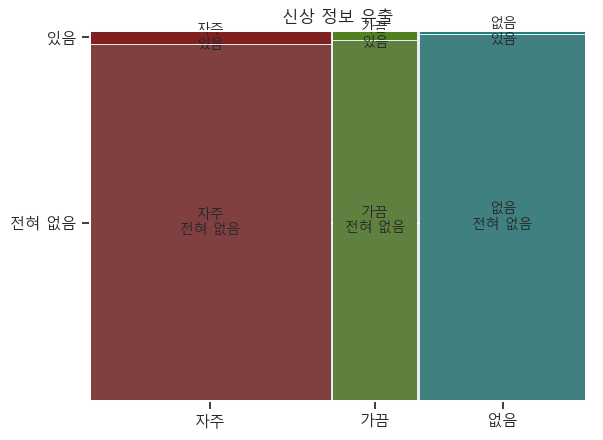

카이제곱통계량: 43.383610829925274,  p-value: 3.796370637630769e-10,  자유도: 2
기대빈도: [[  34.07519131 1509.92480869]
 [  67.24553621 2979.75446379]
 [  97.67927249 4328.32072751]]


<Figure size 2000x2000 with 0 Axes>

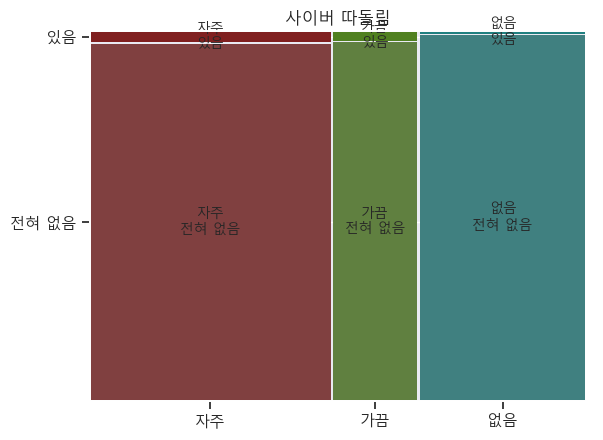

카이제곱통계량: 30.14300089387293,  p-value: 2.847937944100697e-07,  자유도: 2
기대빈도: [[  24.82865698 1519.17134302]
 [  48.99800377 2998.00199623]
 [  71.17333925 4354.82666075]]


<Figure size 2000x2000 with 0 Axes>

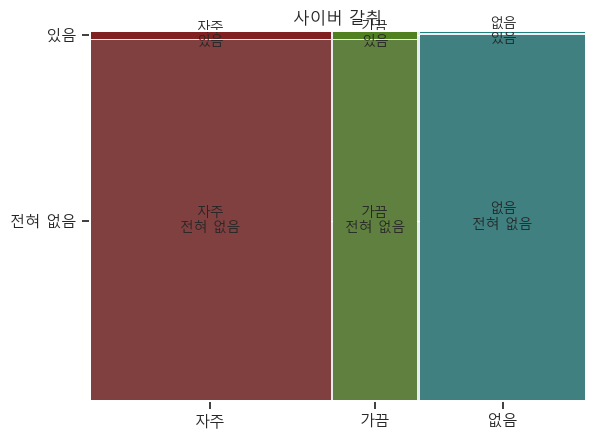

카이제곱통계량: 40.1270124622587,  p-value: 1.934327277480379e-09,  자유도: 2
기대빈도: [[  23.63003216 1520.36996784]
 [  46.6325829  3000.3674171 ]
 [  67.73738494 4358.26261506]]


<Figure size 2000x2000 with 0 Axes>

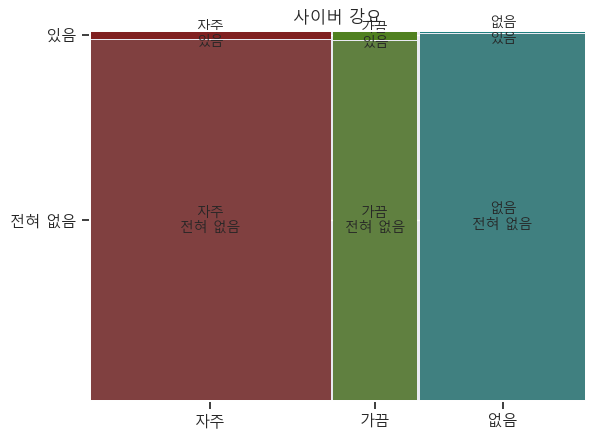

In [36]:
target_by = 'Q6_3'
p1 = []
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_1', '사이버 언어 폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_2', '사이버 명예훼손', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_3', '사이버 스토킹', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_4', '사이버 성폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_5', '신상 정보 유출', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_6', '사이버 따돌림', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_7', '사이버 갈취', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_8', '사이버 강요', p1)

In [37]:
vi_dict = {0 : '사이버 언어 폭력', 1 : '사이버 명예훼손', 2 : '사이버 스토킹', 3: '사이버 성폭력', 4: '신상 정보 유출', 5 : '사이버 따돌림', 6 : '사이버 갈취', 7 : '사이버 강요'}
my_dict = {value: index for index, value in enumerate(p1)}
p1.sort()
sorted_list = p1
index_list = [my_dict[value] for value in p1]
index_list2 = [vi_dict[value] for value in index_list]
content_type = ['비난하는 내용' for _ in range(8)]
df3 = pd.DataFrame({'폭력 유형': index_list2, 'p-value': sorted_list, '컨텐츠 내용' : content_type})
df3

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,3.335855e-28,비난하는 내용
1,사이버 명예훼손,4.959289e-18,비난하는 내용
2,사이버 스토킹,1.912117e-17,비난하는 내용
3,신상 정보 유출,4.263937e-13,비난하는 내용
4,사이버 따돌림,3.796371e-10,비난하는 내용
5,사이버 강요,1.934327e-09,비난하는 내용
6,사이버 성폭력,8.632182e-09,비난하는 내용
7,사이버 갈취,2.847938e-07,비난하는 내용


### ❗ (사기 도둑질과 같은) 불법 행동에 대한 내용

카이제곱통계량: 104.07821768463484,  p-value: 2.51016451933039e-23,  자유도: 2
기대빈도: [[ 202.00510147 1517.99489853]
 [ 457.91737829 3441.08262171]
 [ 399.07752024 2998.92247976]]


<Figure size 2000x2000 with 0 Axes>

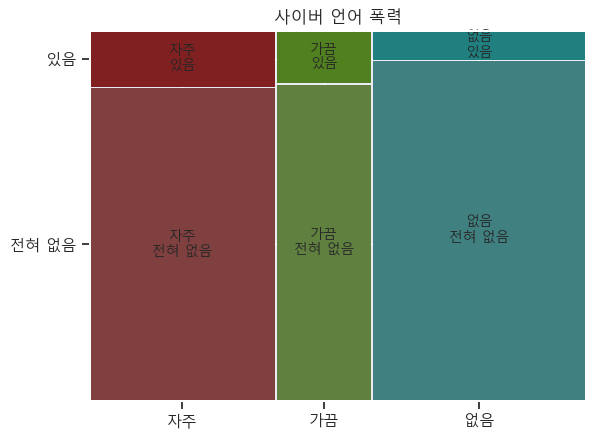

카이제곱통계량: 99.40980430707525,  p-value: 2.5908082491326495e-22,  자유도: 2
기대빈도: [[  67.71653543 1652.28346457]
 [ 153.50393701 3745.49606299]
 [ 133.77952756 3264.22047244]]


<Figure size 2000x2000 with 0 Axes>

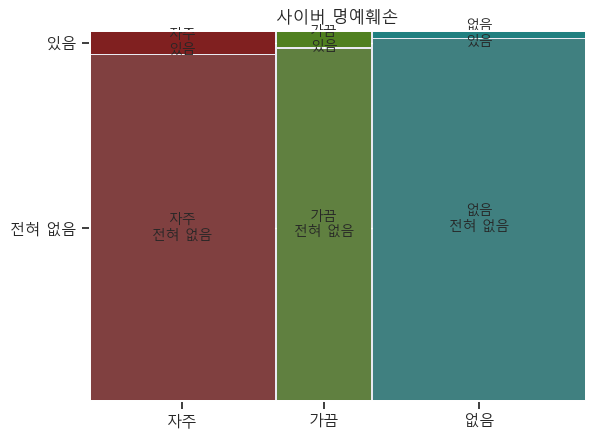

카이제곱통계량: 97.25396703717561,  p-value: 7.61323764317758e-22,  자유도: 2
기대빈도: [[  39.29466563 1680.70533437]
 [  89.07552401 3809.92447599]
 [  77.62981036 3320.37018964]]


<Figure size 2000x2000 with 0 Axes>

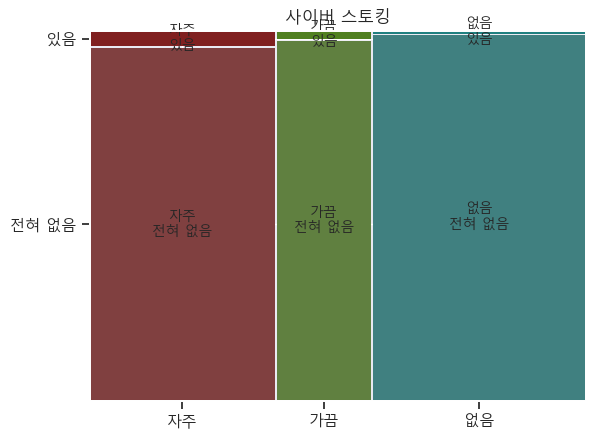

카이제곱통계량: 77.59151843224886,  p-value: 1.4164976266362823e-17,  자유도: 2
기대빈도: [[  30.32937784 1689.67062216]
 [  68.75246756 3830.24753244]
 [  59.9181546  3338.0818454 ]]


<Figure size 2000x2000 with 0 Axes>

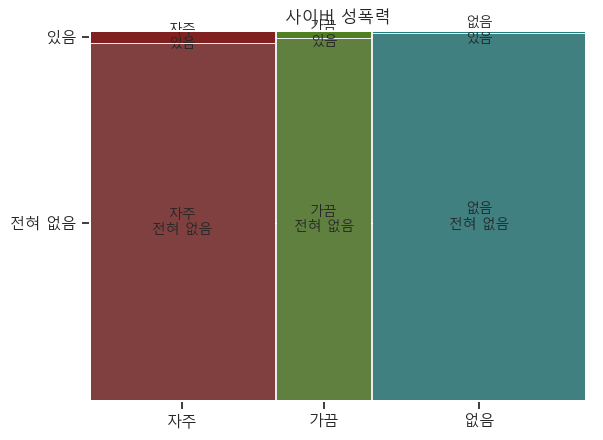

카이제곱통계량: 92.62993923158578,  p-value: 7.685360896777083e-21,  자유도: 2
기대빈도: [[  39.67616724 1680.32383276]
 [  89.94033492 3809.05966508]
 [  78.38349784 3319.61650216]]


<Figure size 2000x2000 with 0 Axes>

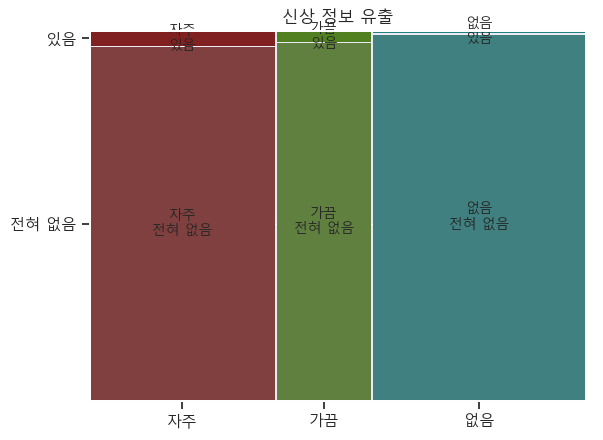

카이제곱통계량: 48.81404942589971,  p-value: 2.512834276691148e-11,  자유도: 2
기대빈도: [[  37.95941    1682.04059   ]
 [  86.04868582 3812.95131418]
 [  74.99190418 3323.00809582]]


<Figure size 2000x2000 with 0 Axes>

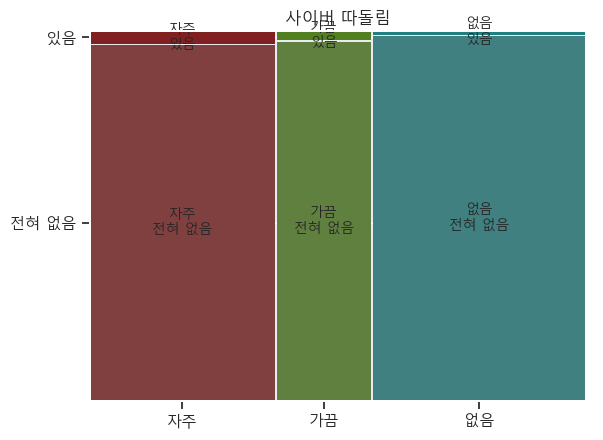

카이제곱통계량: 57.52140887194385,  p-value: 3.231355707794827e-13,  자유도: 2
기대빈도: [[  27.65886659 1692.34113341]
 [  62.69879117 3836.30120883]
 [  54.64234224 3343.35765776]]


<Figure size 2000x2000 with 0 Axes>

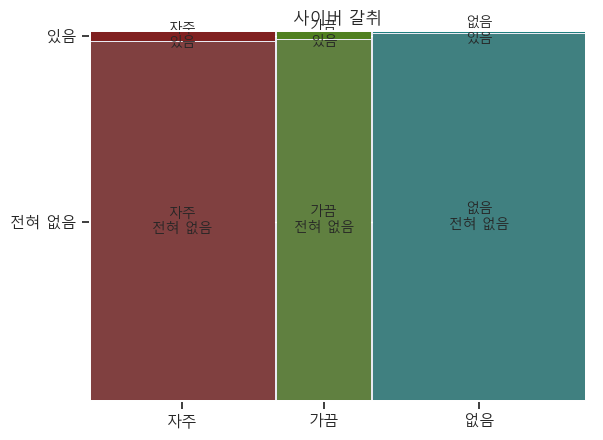

카이제곱통계량: 60.024885557917685,  p-value: 9.241909525973698e-14,  자유도: 2
기대빈도: [[  26.32361096 1693.67638904]
 [  59.67195298 3839.32804702]
 [  52.00443607 3345.99556393]]


<Figure size 2000x2000 with 0 Axes>

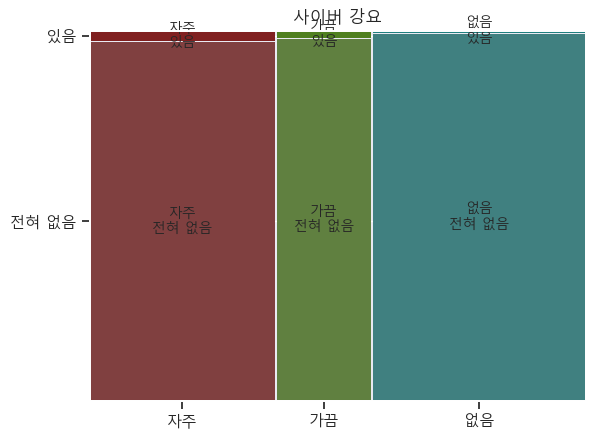

In [38]:
target_by = 'Q6_4'
p1 = []
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_1', '사이버 언어 폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_2', '사이버 명예훼손', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_3', '사이버 스토킹', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_4', '사이버 성폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_5', '신상 정보 유출', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_6', '사이버 따돌림', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_7', '사이버 갈취', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_8', '사이버 강요', p1)

In [39]:
vi_dict = {0 : '사이버 언어 폭력', 1 : '사이버 명예훼손', 2 : '사이버 스토킹', 3: '사이버 성폭력', 4: '신상 정보 유출', 5 : '사이버 따돌림', 6 : '사이버 갈취', 7 : '사이버 강요'}
my_dict = {value: index for index, value in enumerate(p1)}
p1.sort()
sorted_list = p1
index_list = [my_dict[value] for value in p1]
index_list2 = [vi_dict[value] for value in index_list]
content_type = ['불법 행동에 대한 내용' for _ in range(8)]
df4 = pd.DataFrame({'폭력 유형': index_list2, 'p-value': sorted_list, '컨텐츠 내용' : content_type})
df4

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,2.510165e-23,불법 행동에 대한 내용
1,사이버 명예훼손,2.590808e-22,불법 행동에 대한 내용
2,사이버 스토킹,7.613238e-22,불법 행동에 대한 내용
3,신상 정보 유출,7.685361e-21,불법 행동에 대한 내용
4,사이버 성폭력,1.416498e-17,불법 행동에 대한 내용
5,사이버 강요,9.241910e-14,불법 행동에 대한 내용
6,사이버 갈취,3.231356e-13,불법 행동에 대한 내용
7,사이버 따돌림,2.512834e-11,불법 행동에 대한 내용


### ❗ 거짓을 사실인 것처럼 꾸민 허위 정보

카이제곱통계량: 118.26709469067924,  p-value: 2.0826998826247164e-26,  자유도: 2
기대빈도: [[ 190.143174   1428.856826  ]
 [ 387.09814794 2908.90185206]
 [ 481.75867805 3620.24132195]]


<Figure size 2000x2000 with 0 Axes>

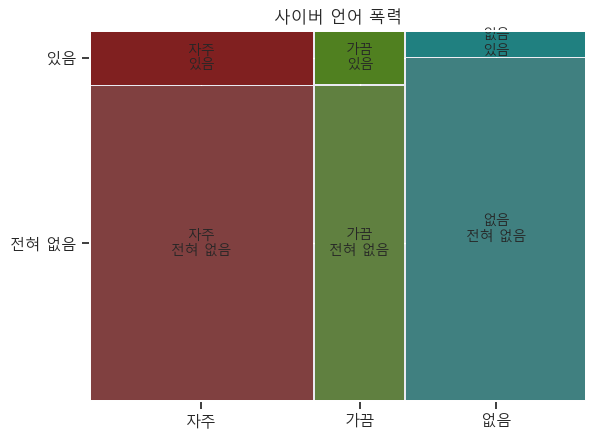

카이제곱통계량: 101.22963231437907,  p-value: 1.0429527663748005e-22,  자유도: 2
기대빈도: [[  63.74015748 1555.25984252]
 [ 129.76377953 3166.23622047]
 [ 161.49606299 3940.50393701]]


<Figure size 2000x2000 with 0 Axes>

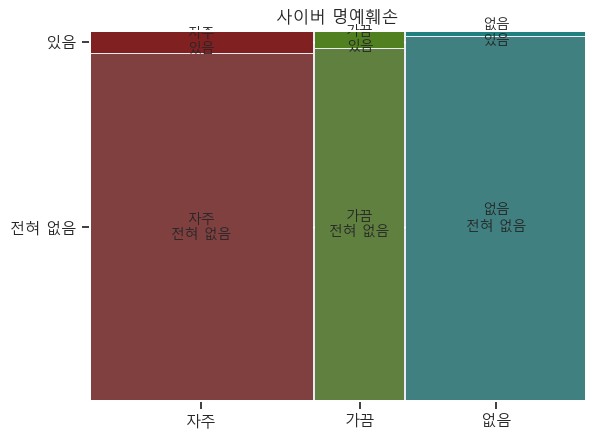

카이제곱통계량: 74.33711816346512,  p-value: 7.209412754054614e-17,  자유도: 2
기대빈도: [[  36.98724631 1582.01275369]
 [  75.2995453  3220.7004547 ]
 [  93.71320838 4008.28679162]]


<Figure size 2000x2000 with 0 Axes>

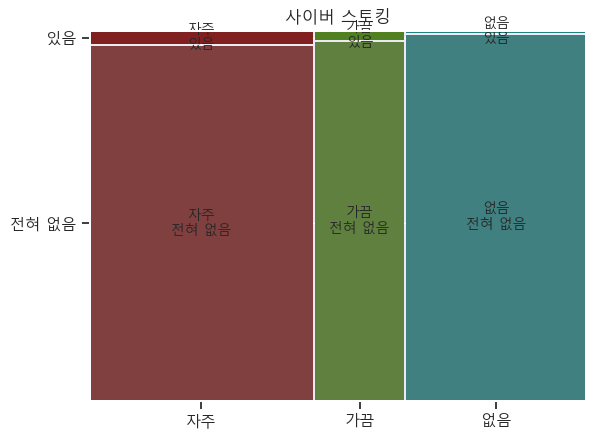

카이제곱통계량: 56.94467596723013,  p-value: 4.311423919499403e-13,  자유도: 2
기대빈도: [[  28.54840856 1590.45159144]
 [  58.11955196 3237.88044804]
 [  72.33203948 4029.66796052]]


<Figure size 2000x2000 with 0 Axes>

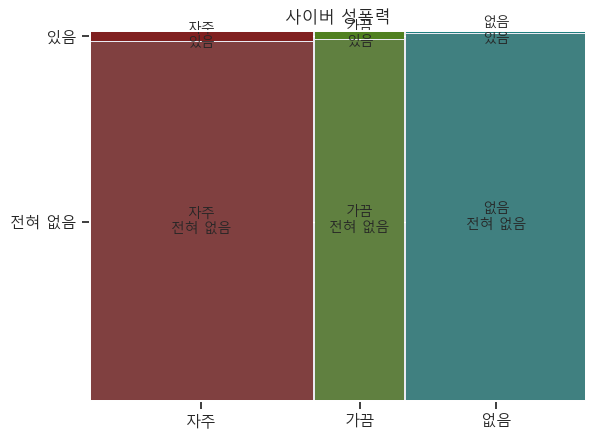

카이제곱통계량: 66.27134305335649,  p-value: 4.067810395126415e-15,  자유도: 2
기대빈도: [[  37.34634579 1581.65365421]
 [  76.03060885 3219.96939115]
 [  94.62304536 4007.37695464]]


<Figure size 2000x2000 with 0 Axes>

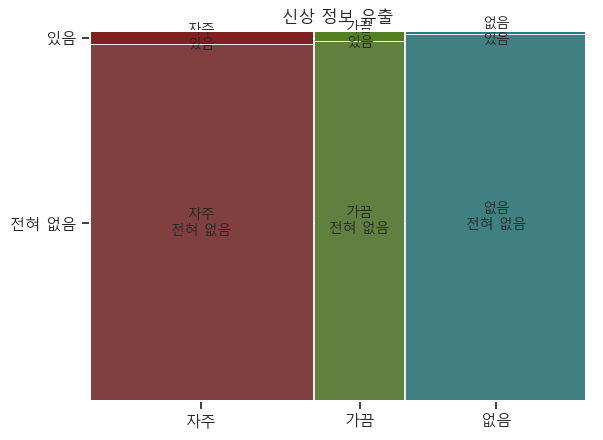

카이제곱통계량: 45.015834144821795,  p-value: 1.6785559287055335e-10,  자유도: 2
기대빈도: [[  35.73039814 1583.26960186]
 [  72.74082289 3223.25917711]
 [  90.52877897 4011.47122103]]


<Figure size 2000x2000 with 0 Axes>

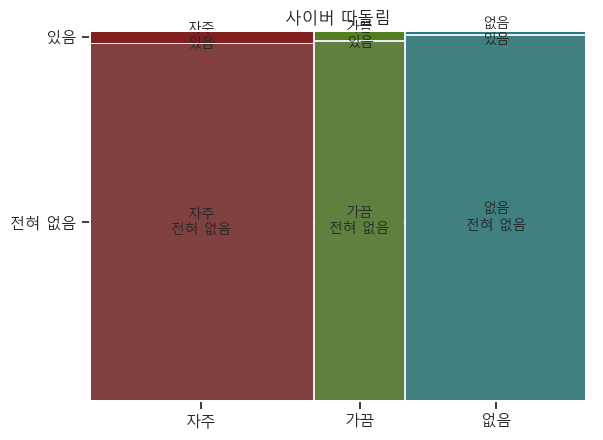

카이제곱통계량: 37.70135921912945,  p-value: 6.505098326532113e-09,  자유도: 2
기대빈도: [[  26.03471221 1592.96528779]
 [  53.00210713 3242.99789287]
 [  65.96318066 4036.03681934]]


<Figure size 2000x2000 with 0 Axes>

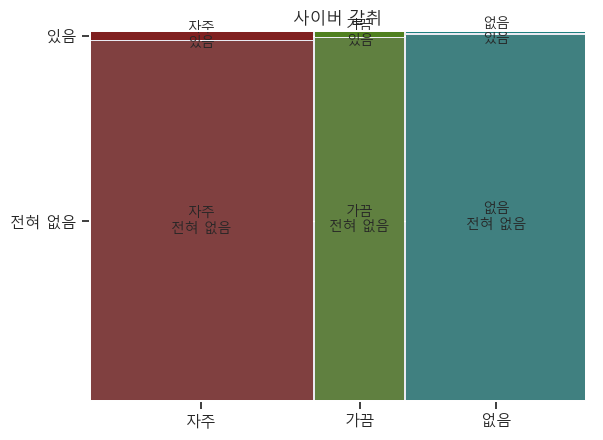

카이제곱통계량: 49.86059615456564,  p-value: 1.489049423633495e-11,  자유도: 2
기대빈도: [[  24.77786403 1594.22213597]
 [  50.44338472 3245.55661528]
 [  62.77875125 4039.22124875]]


<Figure size 2000x2000 with 0 Axes>

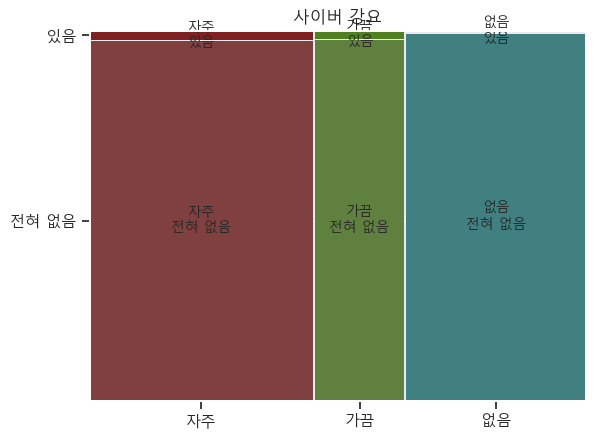

In [40]:
target_by = 'Q6_5'
p1 = []
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_1', '사이버 언어 폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_2', '사이버 명예훼손', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_3', '사이버 스토킹', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_4', '사이버 성폭력', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_5', '신상 정보 유출', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_6', '사이버 따돌림', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_7', '사이버 갈취', p1)
p1 = vi_eda_cc(data1.sort_values(by=target_by, key=lambda x: pd.Categorical(x, categories=['자주', '가끔', '없음'], ordered=True)), target_by, 'Q9a_8', '사이버 강요', p1)

In [41]:
vi_dict = {0 : '사이버 언어 폭력', 1 : '사이버 명예훼손', 2 : '사이버 스토킹', 3: '사이버 성폭력', 4: '신상 정보 유출', 5 : '사이버 따돌림', 6 : '사이버 갈취', 7 : '사이버 강요'}
my_dict = {value: index for index, value in enumerate(p1)}
p1.sort()
sorted_list = p1
index_list = [my_dict[value] for value in p1]
index_list2 = [vi_dict[value] for value in index_list]
content_type = ['허위정보와 같은 내용' for _ in range(8)]
df5 = pd.DataFrame({'폭력 유형': index_list2, 'p-value': sorted_list, '컨텐츠 내용' : content_type})
df5

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,2.082700e-26,허위정보와 같은 내용
1,사이버 명예훼손,1.042953e-22,허위정보와 같은 내용
2,사이버 스토킹,7.209413e-17,허위정보와 같은 내용
3,신상 정보 유출,4.067810e-15,허위정보와 같은 내용
4,사이버 성폭력,4.311424e-13,허위정보와 같은 내용
5,사이버 강요,1.489049e-11,허위정보와 같은 내용
6,사이버 따돌림,1.678556e-10,허위정보와 같은 내용
7,사이버 갈취,6.505098e-09,허위정보와 같은 내용


In [42]:
dfdf = pd.concat([df1, df2, df3, df4, df5], axis=0)
dfdf

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,2.999340e-47,폭력/잔인한 내용
1,사이버 명예훼손,2.027692e-28,폭력/잔인한 내용
2,신상 정보 유출,4.458513e-19,폭력/잔인한 내용
3,사이버 성폭력,7.111230e-15,폭력/잔인한 내용
4,사이버 스토킹,2.814470e-13,폭력/잔인한 내용
5,사이버 따돌림,7.341778e-11,폭력/잔인한 내용
6,사이버 갈취,8.173819e-10,폭력/잔인한 내용
7,사이버 강요,1.097252e-07,폭력/잔인한 내용
0,사이버 언어 폭력,1.438725e-28,선정적인 내용
1,사이버 명예훼손,2.875968e-22,선정적인 내용


In [43]:
dfdf.loc[dfdf['폭력 유형'] == '사이버 언어 폭력', :].sort_values('p-value')

,폭력 유형,p-value,컨텐츠 내용
0,사이버 언어 폭력,2.999340e-47,폭력/잔인한 내용
0,사이버 언어 폭력,1.438725e-28,선정적인 내용
0,사이버 언어 폭력,3.335855e-28,비난하는 내용
0,사이버 언어 폭력,2.082700e-26,허위정보와 같은 내용
0,사이버 언어 폭력,2.510165e-23,불법 행동에 대한 내용


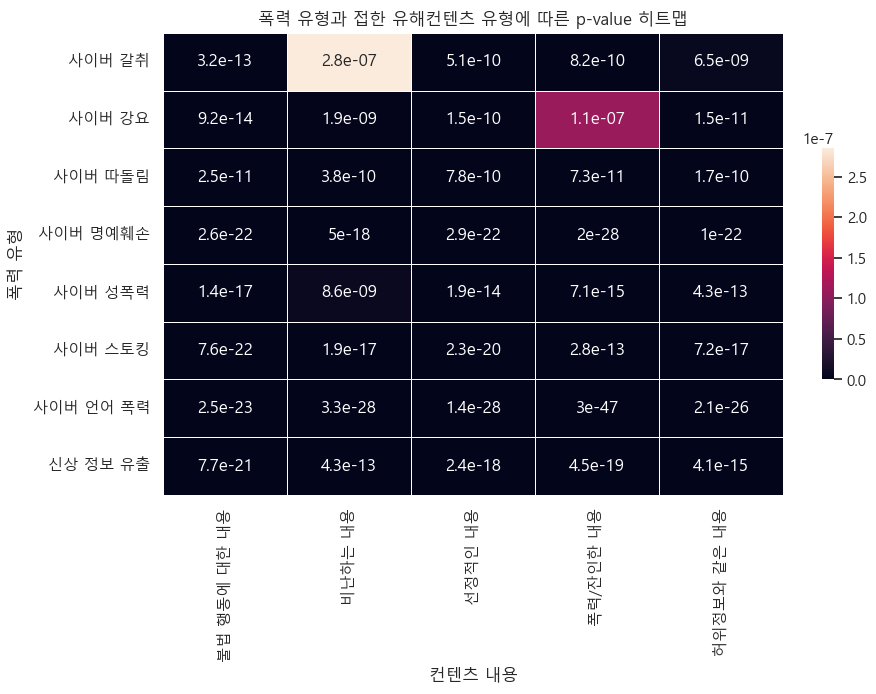

In [44]:
# 폭력유형과 접한 유해컨텐츠 유형에 따른 p-value를 pivot_table로 변경
pivot_table = dfdf.pivot("폭력 유형", "컨텐츠 내용", "p-value")

# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("폭력 유형과 접한 유해컨텐츠 유형에 따른 p-value 히트맵")
plt.show()

- 가해 유형 - 접한 유해컨텐츠 유형의 연관성, 순위를 시각화
- 청소년들의 인터넷 사용 실태와 엮기

# 💙 사이버폭력 피해경험 - 친구와의 관계

범주별 빈도수
없음    6950
있음    2067
Name: 피해경험, dtype: int64

범주별 비율
없음    0.770766
있음    0.229234
Name: 피해경험, dtype: float64

bar chart


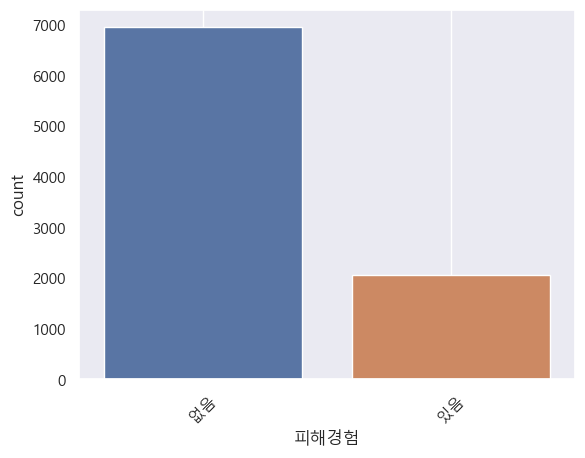

In [45]:
map_dict = {1: '있음', 2: '있음', 3: '있음', 4: '있음', 5:'있음', 9:'전혀 없음'}
data1['Q8a_1'] = data['Q8a_1'].map(map_dict)
data1['Q8a_2'] = data['Q8a_2'].map(map_dict)
data1['Q8a_3'] = data['Q8a_3'].map(map_dict)
data1['Q8a_4'] = data['Q8a_4'].map(map_dict)
data1['Q8a_5'] = data['Q8a_5'].map(map_dict)
data1['Q8a_6'] = data['Q8a_6'].map(map_dict)
data1['Q8a_7'] = data['Q8a_7'].map(map_dict)
data1['Q8a_8'] = data['Q8a_8'].map(map_dict)

data1['피해경험'] = '없음'
data1.loc[(data1['Q8a_1']=='있음') | (data1['Q8a_2']=='있음') | (data1['Q8a_3']=='있음') | (data1['Q8a_4']=='있음') | (data1['Q8a_5']=='있음') | (data1['Q8a_6']=='있음') | (data1['Q8a_7']=='있음') | (data1['Q8a_8']=='있음'), '피해경험'] = '있음'
uni_eda_c(data1, '피해경험')

### ❗ 내 친구들은 나와 이야기를 나눌 때 서로 생각이 달라도 존중해 준다

카이제곱통계량: 4.807879605498384,  p-value: 0.02832988333777771,  자유도: 1
기대빈도: [[6468.27104358  481.72895642]
 [1923.72895642  143.27104358]]


<Figure size 2000x2000 with 0 Axes>

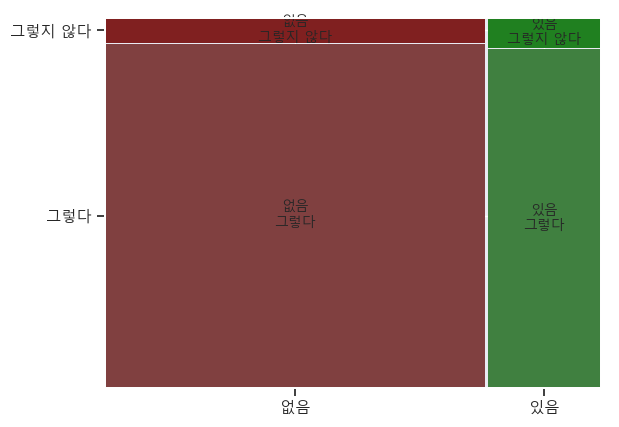

In [48]:
vi_eda_cc(data1, '피해경험', 'Q11_1')

In [67]:
l1 = data1.loc[data1['피해경험'] == '있음', 'Q11_1'].value_counts()
l1

그렇다       1901
그렇지 않다     166
Name: Q11_1, dtype: int64

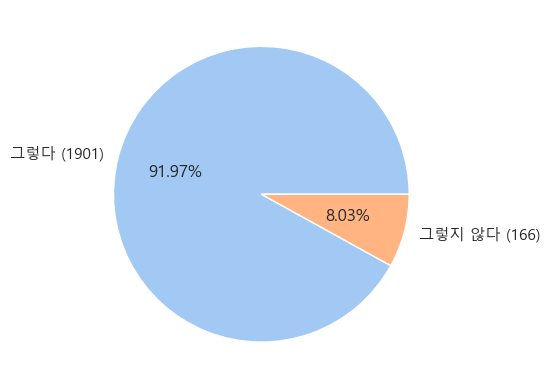

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_pie1(my_list):
    pp = my_list.copy()
    labels = [f'그렇다 ({my_list[0]})', f'그렇지 않다 ({my_list[1]})']
    colors = sns.color_palette('pastel')[0:7]
    plt.pie(pp, labels = labels, colors = colors, autopct='%.2f%%')
    plt.show()
show_pie1(l1)

### ❗ 내 친구들은 내가 말하는 것에 관심을 갖고 들어 준다

In [69]:
l2 = data1.loc[data1['피해경험'] == '있음', 'Q11_2'].value_counts()
l2

그렇다       1888
그렇지 않다     179
Name: Q11_2, dtype: int64

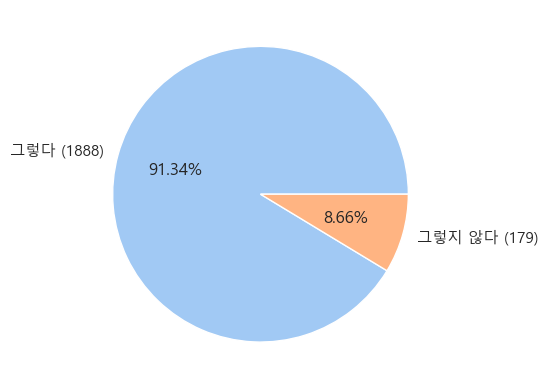

In [70]:
show_pie1(l2)

카이제곱통계량: 5.442516099371281,  p-value: 0.01965234027848089,  자유도: 1
기대빈도: [[6432.04502606  517.95497394]
 [1912.95497394  154.04502606]]


<Figure size 2000x2000 with 0 Axes>

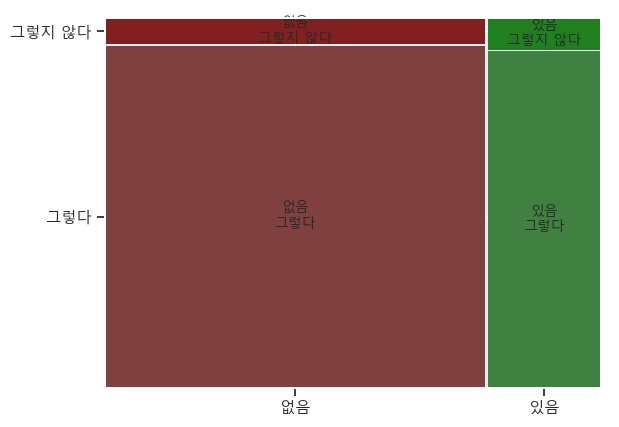

In [49]:
vi_eda_cc(data1, '피해경험', 'Q11_2')

### ❗ 나는 친구들에게 내 고민과 문제를 솔직하게 털어놓는다

In [60]:
data1.loc[data1['피해경험'] == '있음', 'Q11_3'].value_counts()

그렇다       1479
그렇지 않다     588
Name: Q11_3, dtype: int64

카이제곱통계량: 26.523956283817682,  p-value: 2.6029016955354825e-07,  자유도: 1
기대빈도: [[5270.50016635 1679.49983365]
 [1567.49983365  499.50016635]]


<Figure size 2000x2000 with 0 Axes>

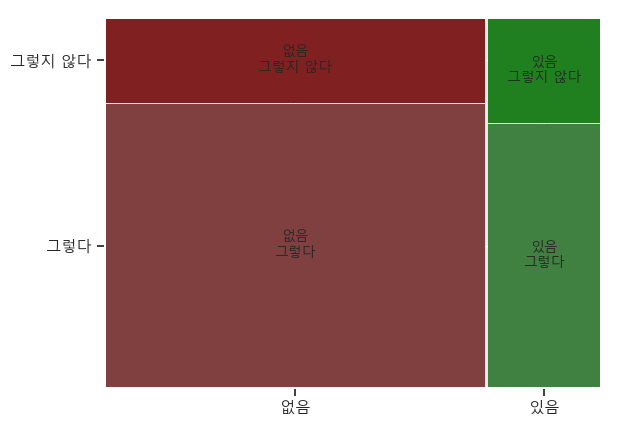

In [61]:
vi_eda_cc(data1, '피해경험', 'Q11_3')

In [81]:
data1.loc[:, 'Q11_2'].value_counts()

그렇다       8345
그렇지 않다     672
Name: Q11_2, dtype: int64

In [82]:
l3 = data1.loc[data1['피해경험'] == '있음', 'Q11_3'].value_counts()
l3

그렇다       1479
그렇지 않다     588
Name: Q11_3, dtype: int64

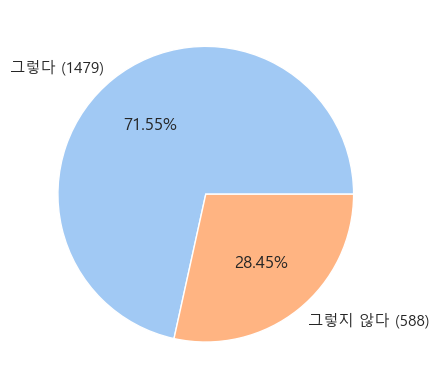

In [83]:
show_pie1(l3)

전체 기준

In [84]:
l3 = data1.loc[:, 'Q11_3'].value_counts()
l3

그렇다       6838
그렇지 않다    2179
Name: Q11_3, dtype: int64

In [86]:
data1.shape

(9017, 249)

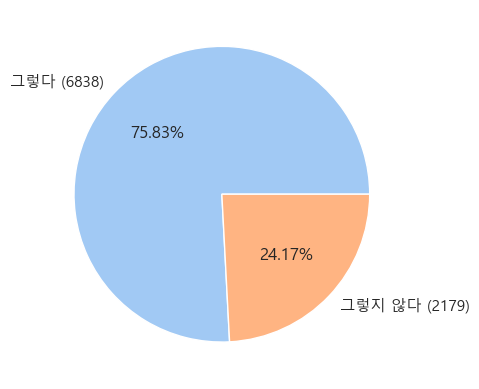

In [85]:
show_pie1(l3)

### 통합

범주별 빈도수
좋음    6397
나쁨    2620
Name: 친구와의 관계, dtype: int64

범주별 비율
좋음    0.709438
나쁨    0.290562
Name: 친구와의 관계, dtype: float64

bar chart


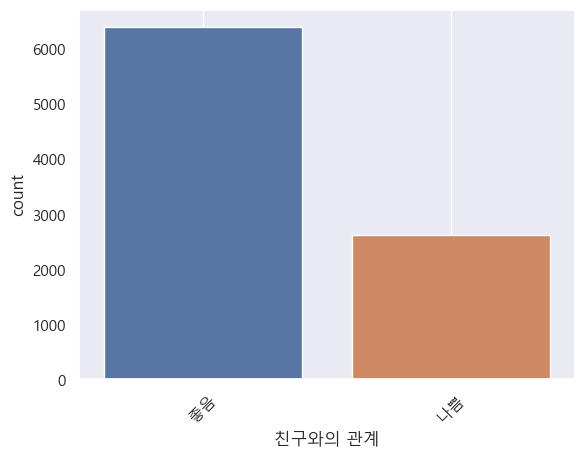

In [50]:
data1['친구와의 관계'] = '좋음'
data1.loc[(data1['Q11_1']=='그렇지 않다') | (data1['Q11_2']=='그렇지 않다') | (data1['Q11_3']=='그렇지 않다'), '친구와의 관계'] = '나쁨'
uni_eda_c(data1, '친구와의 관계')

카이제곱통계량: 25.164334003613277,  p-value: 5.264688365946407e-07,  자유도: 1
기대빈도: [[2019.40778529 4930.59221471]
 [ 600.59221471 1466.40778529]]


<Figure size 2000x2000 with 0 Axes>

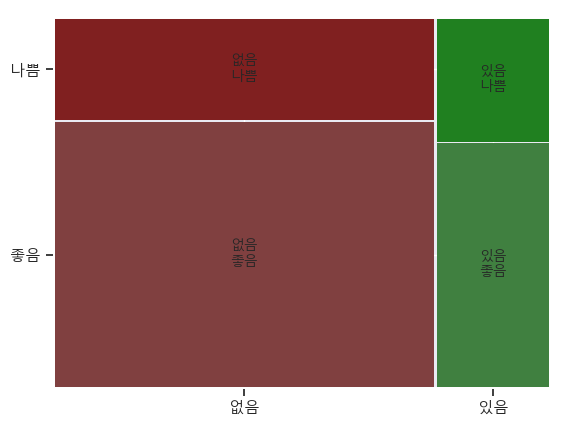

In [51]:
vi_eda_cc(data1, '피해경험', '친구와의 관계')

In [55]:
data1.loc[data1['피해경험'] == '있음', '친구와의 관계'].value_counts()

좋음    1375
나쁨     692
Name: 친구와의 관계, dtype: int64

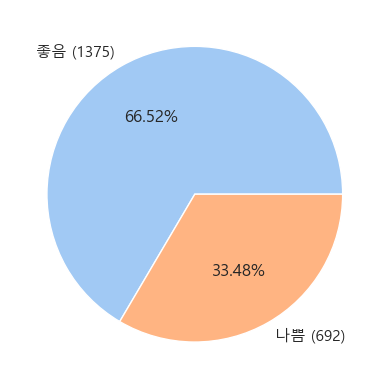

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

pp = [1375, 692]
labels = [f'좋음 ({pp[0]})', f'나쁨 ({pp[1]})']
colors = sns.color_palette('pastel')[0:7]
plt.pie(pp, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

# 💙 사이버폭력 피해경험 - 부모와의 관계

### ❗ 내 일은 나 스스로 결정할 수 있게 격려해 주신다

카이제곱통계량: 11.32970722115246,  p-value: 0.0007627692647074284,  자유도: 1
기대빈도: [[6382.71598092  567.28401908]
 [1898.28401908  168.71598092]]


<Figure size 2000x2000 with 0 Axes>

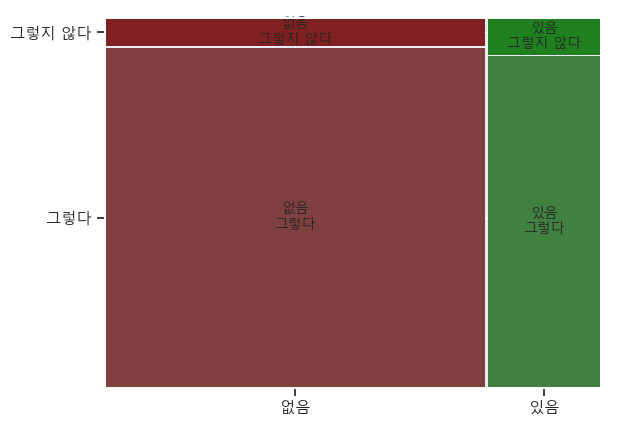

In [62]:
vi_eda_cc(data1, '피해경험', 'Q12_1')

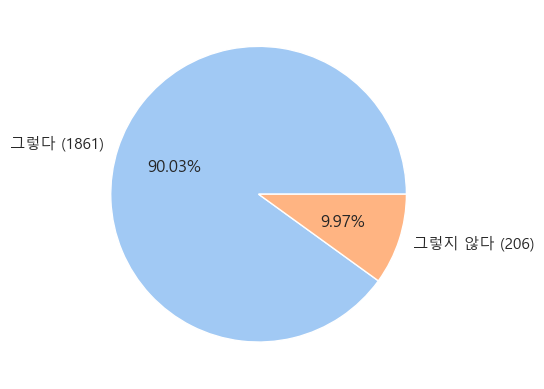

In [73]:
l3 = data1.loc[data1['피해경험'] == '있음', 'Q12_1'].value_counts()
show_pie1(l3)

### ❗ 내가 학교생활을 어떻게 하는지 관심 있게 물어보신다

카이제곱통계량: 3.9366152103515586,  p-value: 0.04724574923370774,  자유도: 1
기대빈도: [[6318.74237551  631.25762449]
 [1879.25762449  187.74237551]]


<Figure size 2000x2000 with 0 Axes>

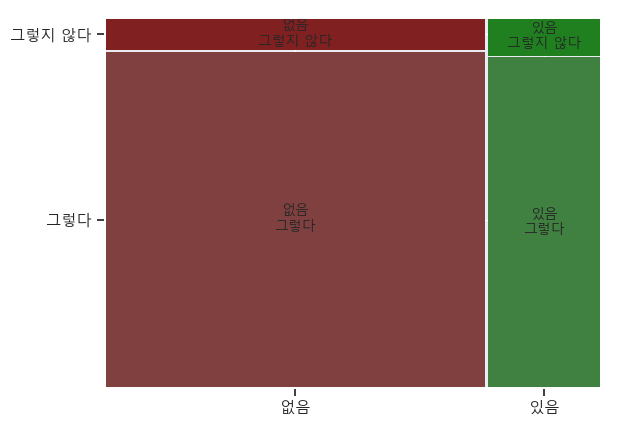

In [63]:
vi_eda_cc(data1, '피해경험', 'Q12_2')

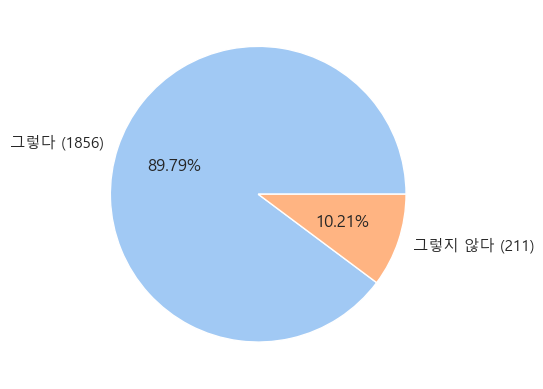

In [74]:
l3 = data1.loc[data1['피해경험'] == '있음', 'Q12_2'].value_counts()
show_pie1(l3)

### ❗ 사소한 것도 여쭤보면 잘 듣고 응답해 주신다

카이제곱통계량: 12.879533867175532,  p-value: 0.00033219496879655373,  자유도: 1
기대빈도: [[6252.45647111  697.54352889]
 [1859.54352889  207.45647111]]


<Figure size 2000x2000 with 0 Axes>

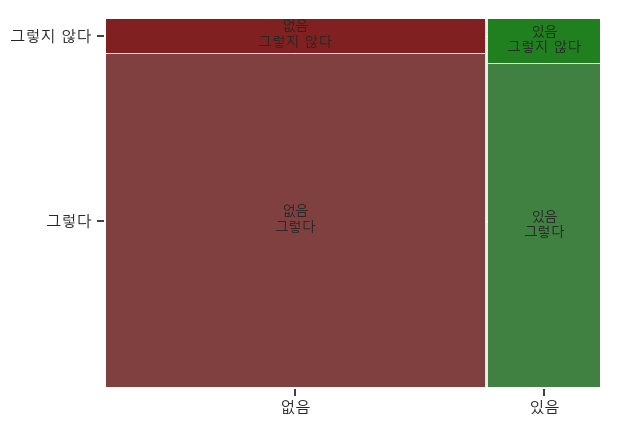

In [64]:
vi_eda_cc(data1, '피해경험', 'Q12_3')

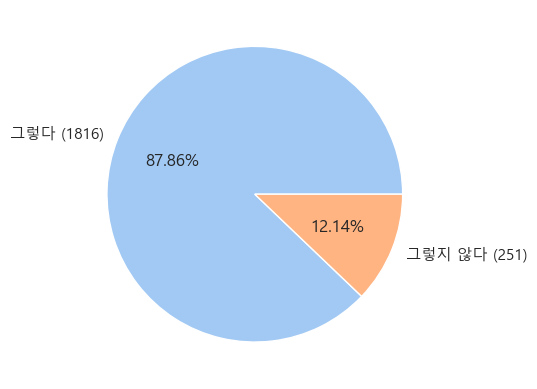

In [75]:
l3 = data1.loc[data1['피해경험'] == '있음', 'Q12_3'].value_counts()
show_pie1(l3)

### 통합

범주별 빈도수
좋음    7439
나쁨    1578
Name: 부모와의 관계, dtype: int64

범주별 비율
좋음    0.824997
나쁨    0.175003
Name: 부모와의 관계, dtype: float64

bar chart


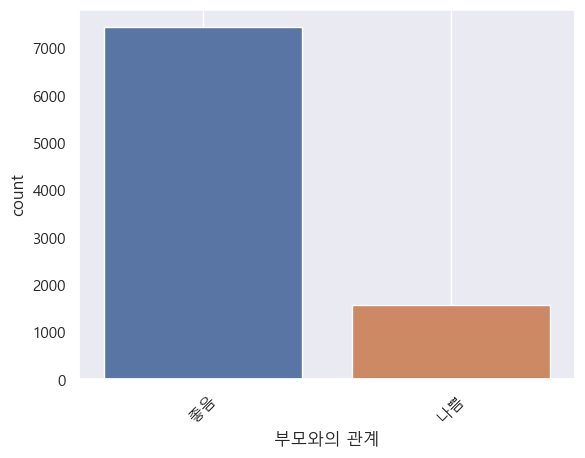

In [76]:
data1['부모와의 관계'] = '좋음'
data1.loc[(data1['Q12_1']=='그렇지 않다') | (data1['Q12_2']=='그렇지 않다') | (data1['Q12_3']=='그렇지 않다'), '부모와의 관계'] = '나쁨'
uni_eda_c(data1, '부모와의 관계')

카이제곱통계량: 21.162536377665898,  p-value: 4.2193215880607665e-06,  자유도: 1
기대빈도: [[1216.26926916 5733.73073084]
 [ 361.73073084 1705.26926916]]


<Figure size 2000x2000 with 0 Axes>

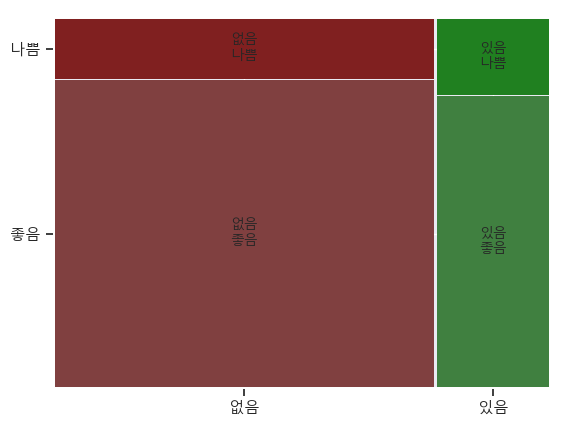

In [77]:
vi_eda_cc(data1, '피해경험', '부모와의 관계')

In [79]:
data1.loc[data1['피해경험'] == '있음', '부모와의 관계'].value_counts()

좋음    1635
나쁨     432
Name: 부모와의 관계, dtype: int64

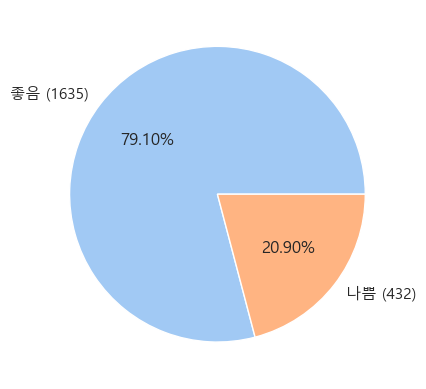

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

pp = [1635, 432]
labels = [f'좋음 ({pp[0]})', f'나쁨 ({pp[1]})']
colors = sns.color_palette('pastel')[0:7]
plt.pie(pp, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()